In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/titanic_train2.csv')
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen Harris
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina
3,1.0,1,female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,0.0,3,male,35.0,0,0,373450,8.0500,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,27.0,0,0,211536,13.0000,S,Montvila,Rev,Juozas
887,1.0,1,female,19.0,0,0,112053,30.0000,S,Graham,Miss,Margaret Edith
888,0.0,3,female,21.0,1,2,W./C. 6607,23.4500,S,Johnston,Miss,"Catherine Helen ""Carrie"""
889,1.0,1,male,26.0,0,0,111369,30.0000,C,Behr,Mr,Karl Howell


In [3]:
df2 = pd.read_csv('data/titanic_test2.csv')
df2

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,3,male,34.5,0,0,330911,7.8292,Q,Kelly,Mr,James
1,3,female,47.0,1,0,363272,7.0000,S,Wilkes,Mrs,James (Ellen Needs)
2,2,male,62.0,0,0,240276,9.6875,Q,Myles,Mr,Thomas Francis
3,3,male,27.0,0,0,315154,8.6625,S,Wirz,Mr,Albert
4,3,female,22.0,1,1,3101298,12.2875,S,Hirvonen,Mrs,Alexander (Helga E Lindqvist)
...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,32.0,0,0,A.5. 3236,8.0500,S,Spector,Mr,Woolf
414,1,female,39.0,0,0,PC 17758,108.9000,C,Oliva y Ocana,Dona,Fermina
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr,Simon Sivertsen
416,3,male,32.0,0,0,359309,8.0500,S,Ware,Mr,Frederick


### 전처리

In [4]:
# 두 데이터 프레임을 합친다.
total_df = pd.concat([df1, df2])
total_df.reset_index(inplace=True, drop=True)
total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen Harris
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina
3,1.0,1,female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,0.0,3,male,35.0,0,0,373450,8.0500,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,32.0,0,0,A.5. 3236,8.0500,S,Spector,Mr,Woolf
1305,NaN,1,female,39.0,0,0,PC 17758,108.9000,C,Oliva y Ocana,Dona,Fermina
1306,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr,Simon Sivertsen
1307,NaN,3,male,32.0,0,0,359309,8.0500,S,Ware,Mr,Frederick


In [5]:
# 인코딩
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()
encoder5 = LabelEncoder()
encoder6 = LabelEncoder()

encoder1.fit(total_df['Sex'])
encoder2.fit(total_df['Ticket'])
encoder3.fit(total_df['Embarked'])
encoder4.fit(total_df['LastName'])
encoder5.fit(total_df['name2'])
encoder6.fit(total_df['FirstName'])

total_df['Sex'] = encoder1.transform(total_df['Sex'])
total_df['Ticket'] = encoder2.transform(total_df['Ticket'])
total_df['Embarked'] = encoder3.transform(total_df['Embarked'])
total_df['LastName'] = encoder4.transform(total_df['LastName'])
total_df['name2'] = encoder5.transform(total_df['name2'])
total_df['FirstName'] = encoder6.transform(total_df['FirstName'])

total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,3,1,22.0,1,0,720,7.2500,2,100,12,855
1,1.0,1,0,38.0,1,0,816,71.2833,0,182,13,601
2,1.0,3,0,26.0,0,0,914,7.9250,2,329,9,690
3,1.0,1,0,35.0,1,0,65,53.1000,2,267,13,541
4,0.0,3,1,35.0,0,0,649,8.0500,2,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.0,0,0,711,8.0500,2,753,12,1119
1305,NaN,1,0,39.0,0,0,834,108.9000,0,593,3,366
1306,NaN,3,1,38.5,0,0,872,7.2500,2,699,12,973
1307,NaN,3,1,32.0,0,0,579,8.0500,2,827,12,390


In [7]:
# StandardScaler
X1 = total_df.drop('Survived', axis=1)
scaler1 = StandardScaler()
scaler1.fit(X1)

StandardScaler()

In [8]:
# 학습과 예측데이터로 나눈다.
a1 = len(df1)

df10 = total_df.iloc[:a1]
df20 = total_df.iloc[a1:]

In [9]:
# 예측 데이터에서 결과 컬럼을 제거한다.
df20.drop('Survived', axis=1, inplace=True)

In [10]:
# 학습데이터를 입력과 결과로 나눈다.
X = df10.drop('Survived', axis=1)
y = df10['Survived']

In [11]:
# 표준화
X = scaler1.transform(X)

### 기본 모델을 통한 교차 검증

In [12]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [13]:
# 검증할 모델들 생성
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = [model1, model2, model3, model4, model5, model6, 
              model7, model8, model9]

In [14]:
# 모델 이름 목록
model_name = ['KNN', 'LR', 'SVM', 'DT', 'RF', 'Ada', 'GB', 'LGBM', 'XGB']

In [15]:
# 결과를 담을 리스트
result_list = []
result_name = []

In [16]:
# 모델의 수 만큼 반복하면서 교차 검증을 수행한다.
for idx, m1 in enumerate(model_list) :
    r1 = cross_val_score(m1, X, y, scoring='f1', cv=kfold)
    print(f'{model_name[idx]} 평균 성능 수치 : {r1.mean()}')
    
    # 검증 결과를 리스트에 담는다.
    result_list.append(r1.mean())
    result_name.append(f'{model_name[idx]} Basic')

KNN 평균 성능 수치 : 0.7418886373565055
LR 평균 성능 수치 : 0.7234505745492864
SVM 평균 성능 수치 : 0.7688857921790441
DT 평균 성능 수치 : 0.7053895838936148
RF 평균 성능 수치 : 0.7777000310744675
Ada 평균 성능 수치 : 0.7659269503600881
GB 평균 성능 수치 : 0.7573419423769406
LGBM 평균 성능 수치 : 0.7813394912105105
XGB 평균 성능 수치 : 0.7618680641426177


### 하이퍼 파라미터 튜닝

In [17]:
# 각 모델별 하이퍼 파라미터
params = [
    # KNN
    {
        'n_neighbors' : list(range(1, 21))
    },
    # LogisticRegression
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # SVM
    {
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # DecisionTree
    {
        'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # GradientBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # LGBM
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # XGBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        'booster' : ['gbtree', 'gblinear']
    }
]

In [18]:
# 튜닝된 모델을 담을 리스트
tuning_model = []

In [19]:
for idx, m1 in enumerate(model_list) :
    grid = GridSearchCV(m1, param_grid=params[idx], scoring='f1', cv=kfold)
    grid.fit(X, y)
    print(f'{model_name[idx]}')
    print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
    print(f'최적의 모델 평균 성능 : {grid.best_score_}')
    print('----------------------------------------------')
    
    result_list.append(grid.best_score_)
    result_name.append(f'{model_name[idx]} Tuning')
    tuning_model.append(grid.best_estimator_)

KNN
최적의 하이퍼 파라미터 : {'n_neighbors': 9}
최적의 모델 평균 성능 : 0.7631302462724896
----------------------------------------------
LR
최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 0.7245370936639745
----------------------------------------------
SVM
최적의 하이퍼 파라미터 : {'C': 1}
최적의 모델 평균 성능 : 0.7688857921790441
----------------------------------------------
DT
최적의 하이퍼 파라미터 : {'max_depth': 3}
최적의 모델 평균 성능 : 0.7563998264395363
----------------------------------------------
RF
최적의 하이퍼 파라미터 : {'n_estimators': 100}
최적의 모델 평균 성능 : 0.7777000310744675
----------------------------------------------
Ada
최적의 하이퍼 파라미터 : {'learning_rate': 1, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.7659269503600881
----------------------------------------------
GB
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 250}
최적의 모델 평균 성능 : 0.7719351848401853
----------------------------------------------
LGBM
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 100}
최적의 모델 평균 성능 : 0.7813394912105105
---------------------

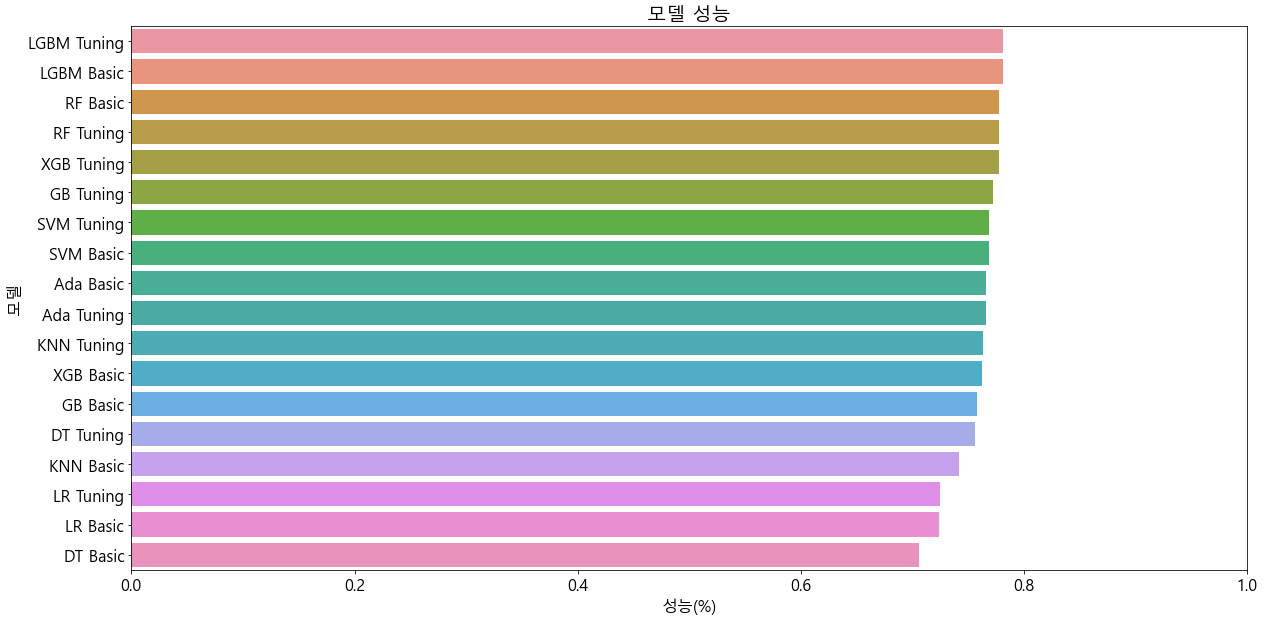

In [20]:
dict1 = {
    'Model' : result_name,
    'Score' : result_list
}

results_df = pd.DataFrame(dict1)

results_df.sort_values('Score', ascending=False, inplace=True)

results_df.reset_index(drop=True, inplace=True)

sns.barplot(data=results_df, x='Score', y='Model')
plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

### 값의 종류가 너무나 많은 컬럼을 삭제한다.

In [21]:
total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,3,1,22.0,1,0,720,7.2500,2,100,12,855
1,1.0,1,0,38.0,1,0,816,71.2833,0,182,13,601
2,1.0,3,0,26.0,0,0,914,7.9250,2,329,9,690
3,1.0,1,0,35.0,1,0,65,53.1000,2,267,13,541
4,0.0,3,1,35.0,0,0,649,8.0500,2,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.0,0,0,711,8.0500,2,753,12,1119
1305,NaN,1,0,39.0,0,0,834,108.9000,0,593,3,366
1306,NaN,3,1,38.5,0,0,872,7.2500,2,699,12,973
1307,NaN,3,1,32.0,0,0,579,8.0500,2,827,12,390


In [22]:
total_df.drop(['Ticket', 'LastName', 'FirstName'], axis=1, inplace=True)
total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name2
0,0.0,3,1,22.0,1,0,7.2500,2,12
1,1.0,1,0,38.0,1,0,71.2833,0,13
2,1.0,3,0,26.0,0,0,7.9250,2,9
3,1.0,1,0,35.0,1,0,53.1000,2,13
4,0.0,3,1,35.0,0,0,8.0500,2,12
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.0,0,0,8.0500,2,12
1305,NaN,1,0,39.0,0,0,108.9000,0,3
1306,NaN,3,1,38.5,0,0,7.2500,2,12
1307,NaN,3,1,32.0,0,0,8.0500,2,12


### 삭제한 데이터를 전처리한다.

In [24]:
# StandardScaler
X1 = total_df.drop('Survived', axis=1)
scaler1 = StandardScaler()
scaler1.fit(X1)

StandardScaler()

In [25]:
# 학습과 예측데이터로 나눈다.
a1 = len(df1)

df10 = total_df.iloc[:a1]
df20 = total_df.iloc[a1:]

In [26]:
# 예측 데이터에서 결과 컬럼을 제거한다.
df20.drop('Survived', axis=1, inplace=True)

In [27]:
# 학습데이터를 입력과 결과로 나눈다.
X = df10.drop('Survived', axis=1)
y = df10['Survived']

In [28]:
# 표준화
X = scaler1.transform(X)

### 제거한 후의 기본 모델을 통한 교차검증

In [29]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [30]:
# 검증할 모델들 생성
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = [model1, model2, model3, model4, model5, model6, 
              model7, model8, model9]

In [31]:
# 모델 이름 목록
model_name = ['KNN', 'LR', 'SVM', 'DT', 'RF', 'Ada', 'GB', 'LGBM', 'XGB']

In [32]:
# 결과를 담을 리스트
result_list = []
result_name = []

In [33]:
# 모델의 수 만큼 반복하면서 교차 검증을 수행한다.
for idx, m1 in enumerate(model_list) :
    r1 = cross_val_score(m1, X, y, scoring='f1', cv=kfold)
    print(f'{model_name[idx]} 평균 성능 수치 : {r1.mean()}')
    
    # 검증 결과를 리스트에 담는다.
    result_list.append(r1.mean())
    result_name.append(f'{model_name[idx]} Basic')

KNN 평균 성능 수치 : 0.737024069464396
LR 평균 성능 수치 : 0.7272368870745166
SVM 평균 성능 수치 : 0.7647384259924667
DT 평균 성능 수치 : 0.7103254655235457
RF 평균 성능 수치 : 0.7593690833695868
Ada 평균 성능 수치 : 0.7472198695940433
GB 평균 성능 수치 : 0.7468854168099195
LGBM 평균 성능 수치 : 0.7616625268037072
XGB 평균 성능 수치 : 0.7374802452529912


### 데이터를 제거한 것을 통한 하이퍼 파라미터 튜닝

In [34]:
# 각 모델별 하이퍼 파라미터
params = [
    # KNN
    {
        'n_neighbors' : list(range(1, 21))
    },
    # LogisticRegression
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # SVM
    {
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # DecisionTree
    {
        'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # GradientBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # LGBM
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # XGBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        'booster' : ['gbtree', 'gblinear']
    }
]

In [35]:
# 튜닝된 모델을 담을 리스트
tuning_model = []

In [36]:
for idx, m1 in enumerate(model_list) :
    grid = GridSearchCV(m1, param_grid=params[idx], scoring='f1', cv=kfold)
    grid.fit(X, y)
    print(f'{model_name[idx]}')
    print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
    print(f'최적의 모델 평균 성능 : {grid.best_score_}')
    print('----------------------------------------------')
    
    result_list.append(grid.best_score_)
    result_name.append(f'{model_name[idx]} Tuning')
    tuning_model.append(grid.best_estimator_)

KNN
최적의 하이퍼 파라미터 : {'n_neighbors': 7}
최적의 모델 평균 성능 : 0.7454166062595983
----------------------------------------------
LR
최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 0.7272368870745166
----------------------------------------------
SVM
최적의 하이퍼 파라미터 : {'C': 0.1}
최적의 모델 평균 성능 : 0.7678566744327124
----------------------------------------------
DT
최적의 하이퍼 파라미터 : {'max_depth': 4}
최적의 모델 평균 성능 : 0.7546284539758779
----------------------------------------------
RF
최적의 하이퍼 파라미터 : {'n_estimators': 100}
최적의 모델 평균 성능 : 0.7593690833695868
----------------------------------------------
Ada
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 250}
최적의 모델 평균 성능 : 0.7539279546103159
----------------------------------------------
GB
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 300}
최적의 모델 평균 성능 : 0.7682712326452075
----------------------------------------------
LGBM
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.7680262346200466
-----------------

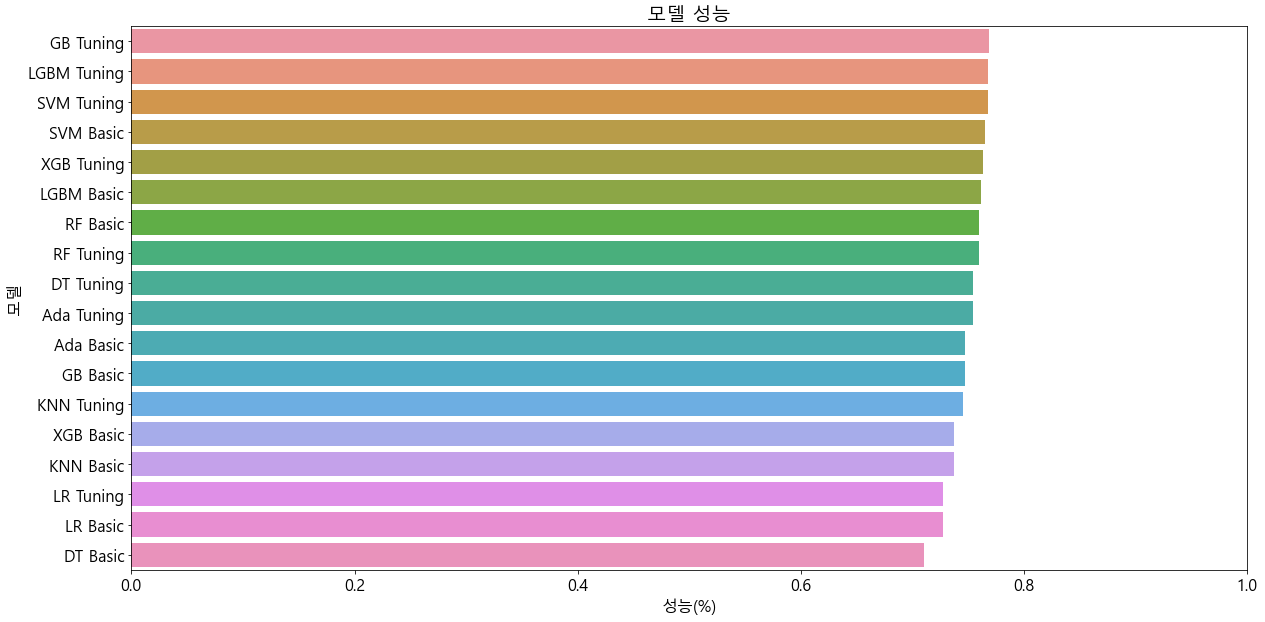

In [37]:
dict1 = {
    'Model' : result_name,
    'Score' : result_list
}

results_df = pd.DataFrame(dict1)

results_df.sort_values('Score', ascending=False, inplace=True)

results_df.reset_index(drop=True, inplace=True)

sns.barplot(data=results_df, x='Score', y='Model')
plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

### 새롭게 데이터를 불러온다.

In [55]:
df1 = pd.read_csv('data/titanic_train2.csv')
df2 = pd.read_csv('data/titanic_test2.csv')

In [56]:
# 두 데이터 프레임을 합친다.
total_df = pd.concat([df1, df2])
total_df.reset_index(inplace=True, drop=True)
total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen Harris
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina
3,1.0,1,female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,0.0,3,male,35.0,0,0,373450,8.0500,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,32.0,0,0,A.5. 3236,8.0500,S,Spector,Mr,Woolf
1305,NaN,1,female,39.0,0,0,PC 17758,108.9000,C,Oliva y Ocana,Dona,Fermina
1306,NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr,Simon Sivertsen
1307,NaN,3,male,32.0,0,0,359309,8.0500,S,Ware,Mr,Frederick


In [57]:
# 인코딩
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()
encoder5 = LabelEncoder()
encoder6 = LabelEncoder()

encoder1.fit(total_df['Sex'])
encoder2.fit(total_df['Ticket'])
encoder3.fit(total_df['Embarked'])
encoder4.fit(total_df['LastName'])
encoder5.fit(total_df['name2'])
encoder6.fit(total_df['FirstName'])

total_df['Sex'] = encoder1.transform(total_df['Sex'])
total_df['Ticket'] = encoder2.transform(total_df['Ticket'])
total_df['Embarked'] = encoder3.transform(total_df['Embarked'])
total_df['LastName'] = encoder4.transform(total_df['LastName'])
total_df['name2'] = encoder5.transform(total_df['name2'])
total_df['FirstName'] = encoder6.transform(total_df['FirstName'])

total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,3,1,22.0,1,0,720,7.2500,2,100,12,855
1,1.0,1,0,38.0,1,0,816,71.2833,0,182,13,601
2,1.0,3,0,26.0,0,0,914,7.9250,2,329,9,690
3,1.0,1,0,35.0,1,0,65,53.1000,2,267,13,541
4,0.0,3,1,35.0,0,0,649,8.0500,2,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.0,0,0,711,8.0500,2,753,12,1119
1305,NaN,1,0,39.0,0,0,834,108.9000,0,593,3,366
1306,NaN,3,1,38.5,0,0,872,7.2500,2,699,12,973
1307,NaN,3,1,32.0,0,0,579,8.0500,2,827,12,390


In [58]:
# 데이터 프레임을 복제한다.
temp = total_df.copy()

In [59]:
temp.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [60]:
# Pclass 값을 생존율로 변환한다.
temp['Pclass'] = temp.groupby('Pclass')['Survived'].transform('mean')
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,0.242363,1,22.0,1,0,720,7.2500,2,100,12,855
1,1.0,0.629630,0,38.0,1,0,816,71.2833,0,182,13,601
2,1.0,0.242363,0,26.0,0,0,914,7.9250,2,329,9,690
3,1.0,0.629630,0,35.0,1,0,65,53.1000,2,267,13,541
4,0.0,0.242363,1,35.0,0,0,649,8.0500,2,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,1,32.0,0,0,711,8.0500,2,753,12,1119
1305,NaN,0.629630,0,39.0,0,0,834,108.9000,0,593,3,366
1306,NaN,0.242363,1,38.5,0,0,872,7.2500,2,699,12,973
1307,NaN,0.242363,1,32.0,0,0,579,8.0500,2,827,12,390


In [61]:
# Sex 값을 생존율로 변환한다.
temp['Sex'] = temp.groupby('Sex')['Survived'].transform('mean')
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,0.242363,0.188908,22.0,1,0,720,7.2500,2,100,12,855
1,1.0,0.629630,0.742038,38.0,1,0,816,71.2833,0,182,13,601
2,1.0,0.242363,0.742038,26.0,0,0,914,7.9250,2,329,9,690
3,1.0,0.629630,0.742038,35.0,1,0,65,53.1000,2,267,13,541
4,0.0,0.242363,0.188908,35.0,0,0,649,8.0500,2,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,0.188908,32.0,0,0,711,8.0500,2,753,12,1119
1305,NaN,0.629630,0.742038,39.0,0,0,834,108.9000,0,593,3,366
1306,NaN,0.242363,0.188908,38.5,0,0,872,7.2500,2,699,12,973
1307,NaN,0.242363,0.188908,32.0,0,0,579,8.0500,2,827,12,390


In [62]:
# Age 값을 생존율로 변환한다.
temp['Age'] = temp.groupby('Age')['Survived'].transform('mean')
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,0.242363,0.188908,0.407407,1,0,720,7.2500,2,100,12,855
1,1.0,0.629630,0.742038,0.454545,1,0,816,71.2833,0,182,13,601
2,1.0,0.242363,0.742038,0.333333,0,0,914,7.9250,2,329,9,690
3,1.0,0.629630,0.742038,0.611111,1,0,65,53.1000,2,267,13,541
4,0.0,0.242363,0.188908,0.611111,0,0,649,8.0500,2,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,0.188908,0.167883,0,0,711,8.0500,2,753,12,1119
1305,NaN,0.629630,0.742038,0.357143,0,0,834,108.9000,0,593,3,366
1306,NaN,0.242363,0.188908,NaN,0,0,872,7.2500,2,699,12,973
1307,NaN,0.242363,0.188908,0.167883,0,0,579,8.0500,2,827,12,390


In [63]:
# SibSp 값을 생존율로 변환한다.
temp['SibSp'] = temp.groupby('SibSp')['Survived'].transform('mean')
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,0.242363,0.188908,0.407407,0.535885,0,720,7.2500,2,100,12,855
1,1.0,0.629630,0.742038,0.454545,0.535885,0,816,71.2833,0,182,13,601
2,1.0,0.242363,0.742038,0.333333,0.345395,0,914,7.9250,2,329,9,690
3,1.0,0.629630,0.742038,0.611111,0.535885,0,65,53.1000,2,267,13,541
4,0.0,0.242363,0.188908,0.611111,0.345395,0,649,8.0500,2,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,0.188908,0.167883,0.345395,0,711,8.0500,2,753,12,1119
1305,NaN,0.629630,0.742038,0.357143,0.345395,0,834,108.9000,0,593,3,366
1306,NaN,0.242363,0.188908,NaN,0.345395,0,872,7.2500,2,699,12,973
1307,NaN,0.242363,0.188908,0.167883,0.345395,0,579,8.0500,2,827,12,390


In [64]:
# Parch 값을 생존율로 변환한다.
temp['Parch'] = temp.groupby('Parch')['Survived'].transform('mean')
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,0.242363,0.188908,0.407407,0.535885,0.343658,720,7.2500,2,100,12,855
1,1.0,0.629630,0.742038,0.454545,0.535885,0.343658,816,71.2833,0,182,13,601
2,1.0,0.242363,0.742038,0.333333,0.345395,0.343658,914,7.9250,2,329,9,690
3,1.0,0.629630,0.742038,0.611111,0.535885,0.343658,65,53.1000,2,267,13,541
4,0.0,0.242363,0.188908,0.611111,0.345395,0.343658,649,8.0500,2,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,711,8.0500,2,753,12,1119
1305,NaN,0.629630,0.742038,0.357143,0.345395,0.343658,834,108.9000,0,593,3,366
1306,NaN,0.242363,0.188908,NaN,0.345395,0.343658,872,7.2500,2,699,12,973
1307,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,579,8.0500,2,827,12,390


In [65]:
# Ticket 값을 생존율로 변환한다.
temp['Ticket'] = temp.groupby('Ticket')['Survived'].transform('mean')
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,0.242363,0.188908,0.407407,0.535885,0.343658,0.0,7.2500,2,100,12,855
1,1.0,0.629630,0.742038,0.454545,0.535885,0.343658,1.0,71.2833,0,182,13,601
2,1.0,0.242363,0.742038,0.333333,0.345395,0.343658,1.0,7.9250,2,329,9,690
3,1.0,0.629630,0.742038,0.611111,0.535885,0.343658,0.5,53.1000,2,267,13,541
4,0.0,0.242363,0.188908,0.611111,0.345395,0.343658,0.0,8.0500,2,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,8.0500,2,753,12,1119
1305,NaN,0.629630,0.742038,0.357143,0.345395,0.343658,0.5,108.9000,0,593,3,366
1306,NaN,0.242363,0.188908,NaN,0.345395,0.343658,NaN,7.2500,2,699,12,973
1307,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,8.0500,2,827,12,390


In [66]:
# Fare 값을 생존율로 변환한다.
temp['Fare'] = temp.groupby('Fare')['Survived'].transform('mean')
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,0.242363,0.188908,0.407407,0.535885,0.343658,0.0,0.076923,2,100,12,855
1,1.0,0.629630,0.742038,0.454545,0.535885,0.343658,1.0,1.000000,0,182,13,601
2,1.0,0.242363,0.742038,0.333333,0.345395,0.343658,1.0,0.444444,2,329,9,690
3,1.0,0.629630,0.742038,0.611111,0.535885,0.343658,0.5,0.600000,2,267,13,541
4,0.0,0.242363,0.188908,0.611111,0.345395,0.343658,0.0,0.116279,2,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,2,753,12,1119
1305,NaN,0.629630,0.742038,0.357143,0.345395,0.343658,0.5,0.500000,0,593,3,366
1306,NaN,0.242363,0.188908,NaN,0.345395,0.343658,NaN,0.076923,2,699,12,973
1307,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,2,827,12,390


In [67]:
# Embarked 값을 생존율로 변환한다.
temp['Embarked'] = temp.groupby('Embarked')['Survived'].transform('mean')
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,0.242363,0.188908,0.407407,0.535885,0.343658,0.0,0.076923,0.339009,100,12,855
1,1.0,0.629630,0.742038,0.454545,0.535885,0.343658,1.0,1.000000,0.553571,182,13,601
2,1.0,0.242363,0.742038,0.333333,0.345395,0.343658,1.0,0.444444,0.339009,329,9,690
3,1.0,0.629630,0.742038,0.611111,0.535885,0.343658,0.5,0.600000,0.339009,267,13,541
4,0.0,0.242363,0.188908,0.611111,0.345395,0.343658,0.0,0.116279,0.339009,15,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,0.339009,753,12,1119
1305,NaN,0.629630,0.742038,0.357143,0.345395,0.343658,0.5,0.500000,0.553571,593,3,366
1306,NaN,0.242363,0.188908,NaN,0.345395,0.343658,NaN,0.076923,0.339009,699,12,973
1307,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,0.339009,827,12,390


In [68]:
# LastName 값을 생존율로 변환한다.
temp['LastName'] = temp.groupby('LastName')['Survived'].transform('mean')
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,0.242363,0.188908,0.407407,0.535885,0.343658,0.0,0.076923,0.339009,0.0,12,855
1,1.0,0.629630,0.742038,0.454545,0.535885,0.343658,1.0,1.000000,0.553571,1.0,13,601
2,1.0,0.242363,0.742038,0.333333,0.345395,0.343658,1.0,0.444444,0.339009,1.0,9,690
3,1.0,0.629630,0.742038,0.611111,0.535885,0.343658,0.5,0.600000,0.339009,0.5,13,541
4,0.0,0.242363,0.188908,0.611111,0.345395,0.343658,0.0,0.116279,0.339009,0.5,12,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,0.339009,NaN,12,1119
1305,NaN,0.629630,0.742038,0.357143,0.345395,0.343658,0.5,0.500000,0.553571,NaN,3,366
1306,NaN,0.242363,0.188908,NaN,0.345395,0.343658,NaN,0.076923,0.339009,NaN,12,973
1307,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,0.339009,NaN,12,390


In [70]:
# name2 값을 생존율로 변환한다.
temp['name2'] = temp.groupby('name2')['Survived'].transform('mean')
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,0.242363,0.188908,0.407407,0.535885,0.343658,0.0,0.076923,0.339009,0.0,0.156673,855
1,1.0,0.629630,0.742038,0.454545,0.535885,0.343658,1.0,1.000000,0.553571,1.0,0.792000,601
2,1.0,0.242363,0.742038,0.333333,0.345395,0.343658,1.0,0.444444,0.339009,1.0,0.697802,690
3,1.0,0.629630,0.742038,0.611111,0.535885,0.343658,0.5,0.600000,0.339009,0.5,0.792000,541
4,0.0,0.242363,0.188908,0.611111,0.345395,0.343658,0.0,0.116279,0.339009,0.5,0.156673,1102
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,0.339009,NaN,0.156673,1119
1305,NaN,0.629630,0.742038,0.357143,0.345395,0.343658,0.5,0.500000,0.553571,NaN,NaN,366
1306,NaN,0.242363,0.188908,NaN,0.345395,0.343658,NaN,0.076923,0.339009,NaN,0.156673,973
1307,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,0.339009,NaN,0.156673,390


In [71]:
# FirstName 값을 생존율로 변환한다.
temp['FirstName'] = temp.groupby('FirstName')['Survived'].transform('mean')
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName
0,0.0,0.242363,0.188908,0.407407,0.535885,0.343658,0.0,0.076923,0.339009,0.0,0.156673,0.00
1,1.0,0.629630,0.742038,0.454545,0.535885,0.343658,1.0,1.000000,0.553571,1.0,0.792000,1.00
2,1.0,0.242363,0.742038,0.333333,0.345395,0.343658,1.0,0.444444,0.339009,1.0,0.697802,1.00
3,1.0,0.629630,0.742038,0.611111,0.535885,0.343658,0.5,0.600000,0.339009,0.5,0.792000,1.00
4,0.0,0.242363,0.188908,0.611111,0.345395,0.343658,0.0,0.116279,0.339009,0.5,0.156673,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,0.339009,NaN,0.156673,NaN
1305,NaN,0.629630,0.742038,0.357143,0.345395,0.343658,0.5,0.500000,0.553571,NaN,NaN,NaN
1306,NaN,0.242363,0.188908,NaN,0.345395,0.343658,NaN,0.076923,0.339009,NaN,0.156673,NaN
1307,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,0.339009,NaN,0.156673,0.00


In [75]:
# 생존율을 기반으로 통계값을 구한다.
# 평균
temp['Mean'] = temp.mean(axis=1)
# 최대
temp['Max'] = temp.max(axis=1)
# 최소
temp['Min'] = temp.min(axis=1)
# 최대 - 최소
temp['Diff'] = temp['Max'] - temp['Min']

temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName,Mean,Max,Min,Diff
0,0.0,0.242363,0.188908,0.407407,0.535885,0.343658,0.0,0.076923,0.339009,0.0,0.156673,0.00,0.215544,0.535885,0.000000,0.535885
1,1.0,0.629630,0.742038,0.454545,0.535885,0.343658,1.0,1.000000,0.553571,1.0,0.792000,1.00,0.771829,1.000000,0.343658,0.656342
2,1.0,0.242363,0.742038,0.333333,0.345395,0.343658,1.0,0.444444,0.339009,1.0,0.697802,1.00,0.650860,1.000000,0.242363,0.757637
3,1.0,0.629630,0.742038,0.611111,0.535885,0.343658,0.5,0.600000,0.339009,0.5,0.792000,1.00,0.659008,1.000000,0.339009,0.660991
4,0.0,0.242363,0.188908,0.611111,0.345395,0.343658,0.0,0.116279,0.339009,0.5,0.156673,0.25,0.283021,0.611111,0.000000,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,0.339009,NaN,0.156673,NaN,0.248308,0.345395,0.116279,0.229116
1305,NaN,0.629630,0.742038,0.357143,0.345395,0.343658,0.5,0.500000,0.553571,NaN,NaN,NaN,0.520990,0.742038,0.343658,0.398380
1306,NaN,0.242363,0.188908,NaN,0.345395,0.343658,NaN,0.076923,0.339009,NaN,0.156673,NaN,0.253352,0.345395,0.076923,0.268472
1307,NaN,0.242363,0.188908,0.167883,0.345395,0.343658,NaN,0.116279,0.339009,NaN,0.156673,0.00,0.223336,0.345395,0.000000,0.345395


In [76]:
# 구한 통계값을 원본에 담아준다.
total_df['Mean'] = temp['Mean']
total_df['Max'] = temp['Max']
total_df['Min'] = temp['Min']
total_df['Diff'] = temp['Diff']

total_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName,Mean,Max,Min,Diff
0,0.0,3,1,22.0,1,0,720,7.2500,2,100,12,855,0.215544,0.535885,0.000000,0.535885
1,1.0,1,0,38.0,1,0,816,71.2833,0,182,13,601,0.771829,1.000000,0.343658,0.656342
2,1.0,3,0,26.0,0,0,914,7.9250,2,329,9,690,0.650860,1.000000,0.242363,0.757637
3,1.0,1,0,35.0,1,0,65,53.1000,2,267,13,541,0.659008,1.000000,0.339009,0.660991
4,0.0,3,1,35.0,0,0,649,8.0500,2,15,12,1102,0.283021,0.611111,0.000000,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.0,0,0,711,8.0500,2,753,12,1119,0.248308,0.345395,0.116279,0.229116
1305,NaN,1,0,39.0,0,0,834,108.9000,0,593,3,366,0.520990,0.742038,0.343658,0.398380
1306,NaN,3,1,38.5,0,0,872,7.2500,2,699,12,973,0.253352,0.345395,0.076923,0.268472
1307,NaN,3,1,32.0,0,0,579,8.0500,2,827,12,390,0.223336,0.345395,0.000000,0.345395


In [77]:
# StandardScaler
X1 = total_df.drop('Survived', axis=1)
scaler1 = StandardScaler()
scaler1.fit(X1)

StandardScaler()

In [78]:
# 학습과 예측데이터로 나눈다.
a1 = len(df1)

df10 = total_df.iloc[:a1]
df20 = total_df.iloc[a1:]

In [79]:
# 예측 데이터에서 Survived 컬럼을 제거한다.
df20.drop('Survived', axis=1, inplace=True)

In [80]:
# 학습데이터를 입력과 결과로 나눈다.
X = df10.drop('Survived', axis=1)
y = df10['Survived']

In [81]:
# 표준화
X = scaler1.transform(X)

### 기본 모델을 통한 교차 검증

In [82]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [83]:
# 검증할 모델들 생성
model1 = KNeighborsClassifier()
model2 = LogisticRegression(random_state=1)
model3 = SVC(random_state=1, probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = [model1, model2, model3, model4, model5, model6, 
              model7, model8, model9]

In [84]:
# 모델 이름 목록
model_name = ['KNN', 'LR', 'SVM', 'DT', 'RF', 'Ada', 'GB', 'LGBM', 'XGB']

In [85]:
# 결과를 담을 리스트
result_list = []
result_name = []

In [86]:
# 모델의 수 만큼 반복하면서 교차 검증을 수행한다.
for idx, m1 in enumerate(model_list) :
    r1 = cross_val_score(m1, X, y, scoring='f1', cv=kfold)
    print(f'{model_name[idx]} 평균 성능 수치 : {r1.mean()}')
    
    # 검증 결과를 리스트에 담는다.
    result_list.append(r1.mean())
    result_name.append(f'{model_name[idx]} Basic')

KNN 평균 성능 수치 : 0.9924776652769506
LR 평균 성능 수치 : 1.0
SVM 평균 성능 수치 : 0.9983050847457626
DT 평균 성능 수치 : 1.0
RF 평균 성능 수치 : 1.0
Ada 평균 성능 수치 : 0.9967071524966261
GB 평균 성능 수치 : 1.0
LGBM 평균 성능 수치 : 0.9984615384615385
XGB 평균 성능 수치 : 0.9982456140350877


### 하이퍼 파라미터 튜닝

In [87]:
# 각 모델별 하이퍼 파라미터
params = [
    # KNN
    {
        'n_neighbors' : list(range(1, 21))
    },
    # LogisticRegression
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # SVM
    {
        'C' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000]
    },
    # DecisionTree
    {
        'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    # RandomForest
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300]
    },
    # AdaBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # GradientBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # LGBM
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
    },
    # XGBoost
    {
        'n_estimators' : [50, 100, 150, 200, 250, 300],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
        'booster' : ['gbtree', 'gblinear']
    }
]

In [88]:
# 튜닝된 모델을 담을 리스트
tuning_model = []

In [89]:
for idx, m1 in enumerate(model_list) :
    grid = GridSearchCV(m1, param_grid=params[idx], scoring='f1', cv=kfold)
    grid.fit(X, y)
    print(f'{model_name[idx]}')
    print(f'최적의 하이퍼 파라미터 : {grid.best_params_}')
    print(f'최적의 모델 평균 성능 : {grid.best_score_}')
    print('----------------------------------------------')
    
    result_list.append(grid.best_score_)
    result_name.append(f'{model_name[idx]} Tuning')
    tuning_model.append(grid.best_estimator_)

KNN
최적의 하이퍼 파라미터 : {'n_neighbors': 17}
최적의 모델 평균 성능 : 0.9940030558232259
----------------------------------------------
LR
최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
SVM
최적의 하이퍼 파라미터 : {'C': 0.1}
최적의 모델 평균 성능 : 0.9983050847457626
----------------------------------------------
DT
최적의 하이퍼 파라미터 : {'max_depth': None}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
RF
최적의 하이퍼 파라미터 : {'n_estimators': 50}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
Ada
최적의 하이퍼 파라미터 : {'learning_rate': 0.0001, 'n_estimators': 50}
최적의 모델 평균 성능 : 0.9967071524966261
----------------------------------------------
GB
최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0
----------------------------------------------
LGBM
최적의 하이퍼 파라미터 : {'learning_rate': 0.001, 'n_estimators': 250}
최적의 모델 평균 성능 : 0.9984615384615385
----------------------------------------------
XGB
최적의 하이퍼 파라미터 : {'bo

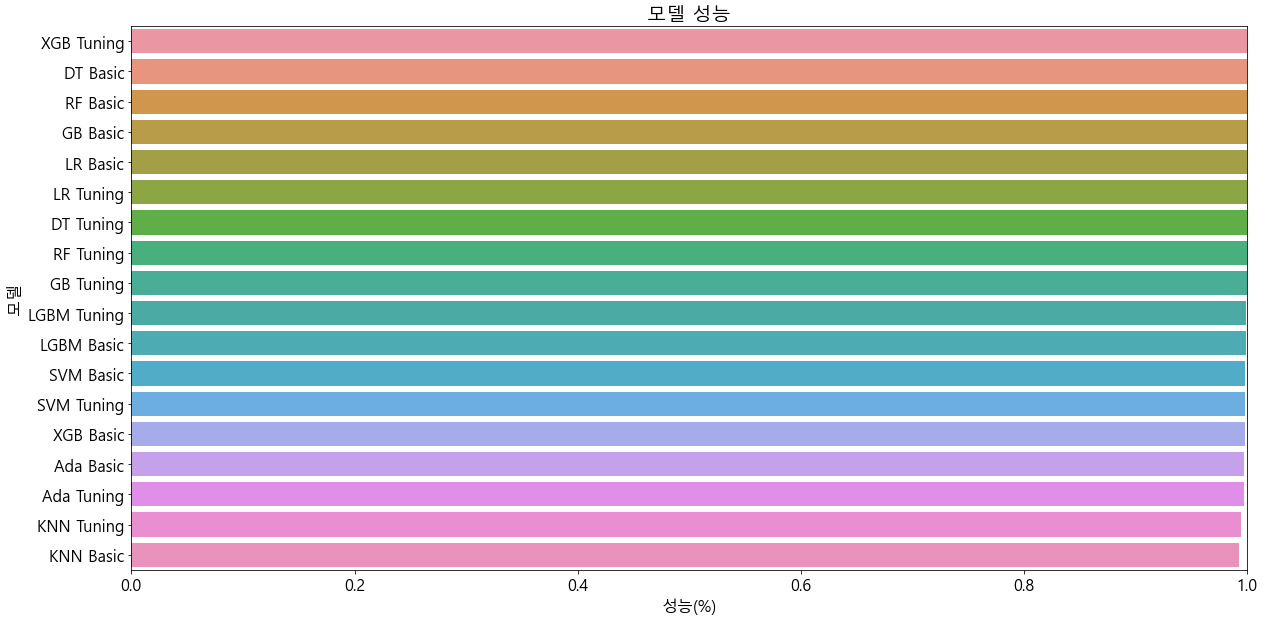

In [90]:
dict1 = {
    'Model' : result_name,
    'Score' : result_list
}

results_df = pd.DataFrame(dict1)

results_df.sort_values('Score', ascending=False, inplace=True)

results_df.reset_index(drop=True, inplace=True)

sns.barplot(data=results_df, x='Score', y='Model')
plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

### 최종 평가를 수행한다.

In [91]:
# 학습용과 검증용으로 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [92]:
# 기본 모델과 튜닝된 모델이 담긴 리스트를 합친 새로운 리스트를 생성한다.
total_model = model_list + tuning_model

In [93]:
# 학습용 데이터를 학습한다.
for m1 in total_model :
    m1.fit(X_train, y_train)

In [94]:
# 학습용 데이터를 통해 결과를 예측한다.
pred_list = []

for m1 in total_model :
    pred = m1.predict(X_train)
    pred_list.append(pred)

In [95]:
# 평가

# 평가 결과를 담을 딕셔너리
dict1 = {
    'accuracy' : [],
    'precision' : [],
    'recall' : [],
    'f1' : [],
    'roc_auc' : [],
    'name' : []
}

# 각 모델별 예측 결과를 하나씩 추출하여 평가한다.
for idx, p1 in enumerate(pred_list) :
    
    r1 = accuracy_score(y_train, p1)
    r2 = precision_score(y_train, p1)
    r3 = recall_score(y_train, p1)
    r4 = f1_score(y_train, p1)
    r5 = roc_auc_score(y_train, p1)
    
    dict1['accuracy'].append(r1)
    dict1['precision'].append(r2)
    dict1['recall'].append(r3)
    dict1['f1'].append(r4)
    dict1['roc_auc'].append(r5)
    dict1['name'].append(result_name[idx])

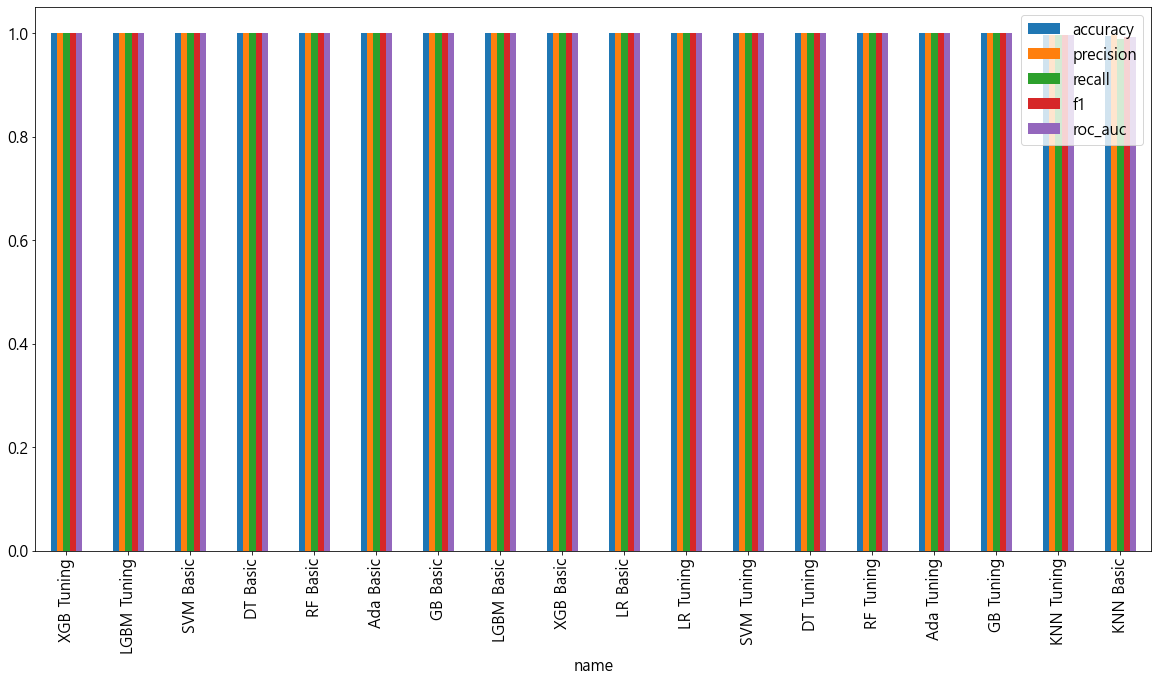

In [96]:
# 시각화
df100 = pd.DataFrame(dict1)
df100.set_index('name', inplace=True)
df100.sort_values('f1', ascending=False, inplace=True)

df100.plot.bar()
plt.show()

In [97]:
# 검증용 데이터를 통해 결과를 예측한다.
pred_list = []

for m1 in total_model :
    pred = m1.predict(X_test)
    pred_list.append(pred)

In [98]:
# 평가

# 평가 결과를 담을 딕셔너리
dict1 = {
    'accuracy' : [],
    'precision' : [],
    'recall' : [],
    'f1' : [],
    'roc_auc' : [],
    'name' : []
}

# 각 모델별 예측 결과를 하나씩 추출하여 평가한다.
for idx, p1 in enumerate(pred_list) :
    
    r1 = accuracy_score(y_test, p1)
    r2 = precision_score(y_test, p1)
    r3 = recall_score(y_test, p1)
    r4 = f1_score(y_test, p1)
    r5 = roc_auc_score(y_test, p1)
    
    dict1['accuracy'].append(r1)
    dict1['precision'].append(r2)
    dict1['recall'].append(r3)
    dict1['f1'].append(r4)
    dict1['roc_auc'].append(r5)
    dict1['name'].append(result_name[idx])

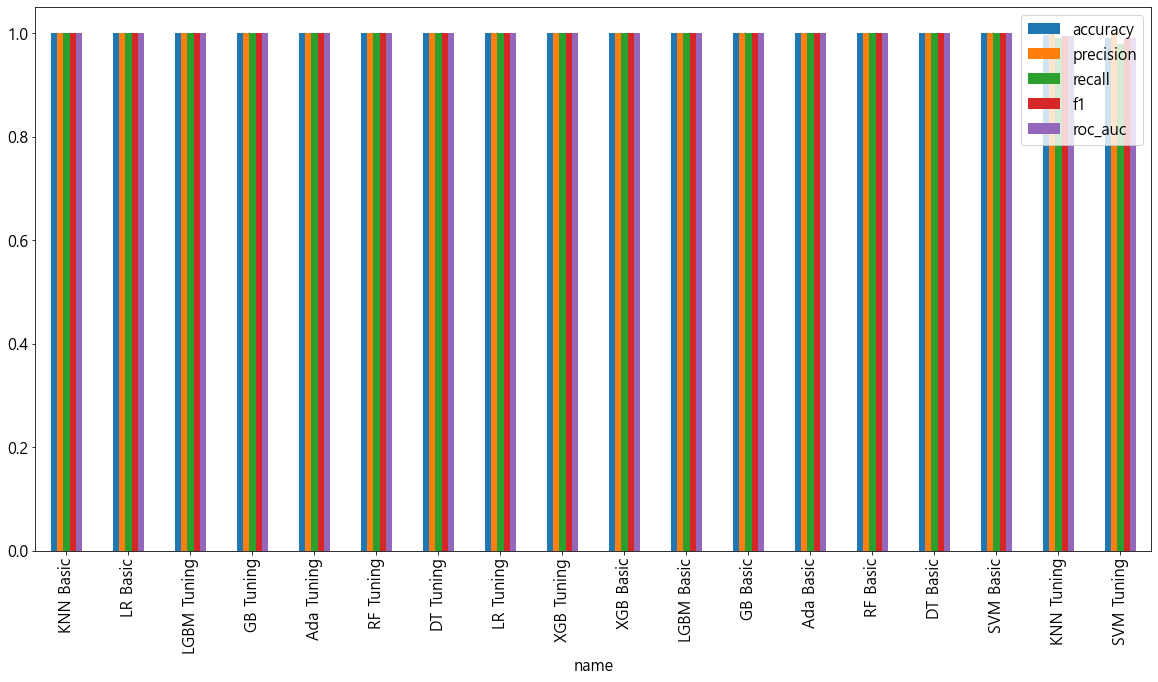

In [99]:
# 시각화
df100 = pd.DataFrame(dict1)
df100.set_index('name', inplace=True)
df100.sort_values('f1', ascending=False, inplace=True)

df100.plot.bar()
plt.show()

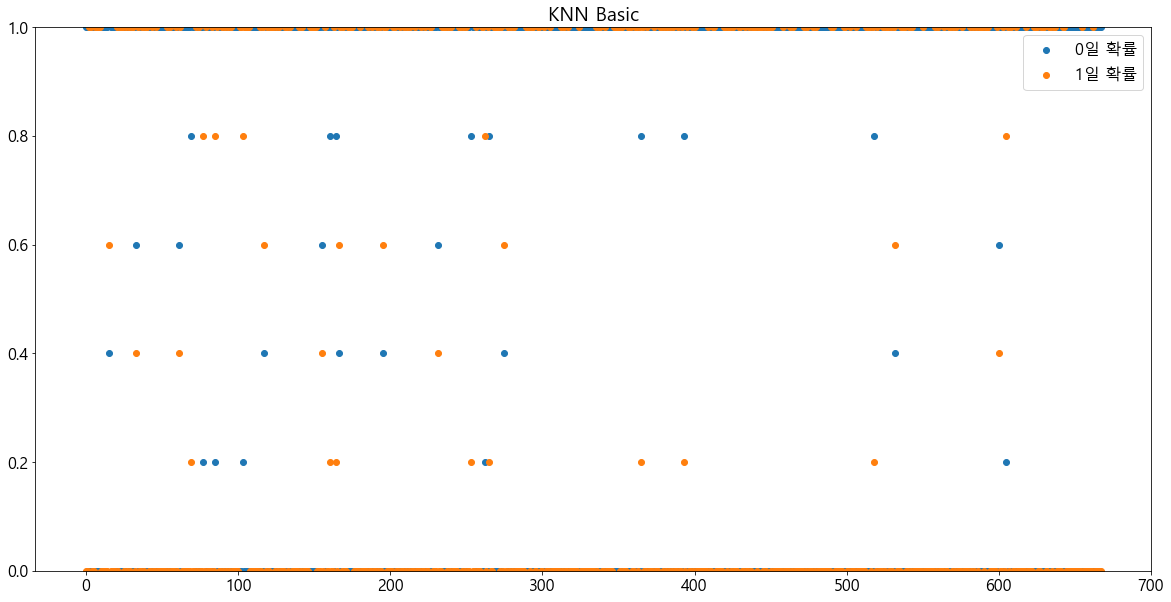

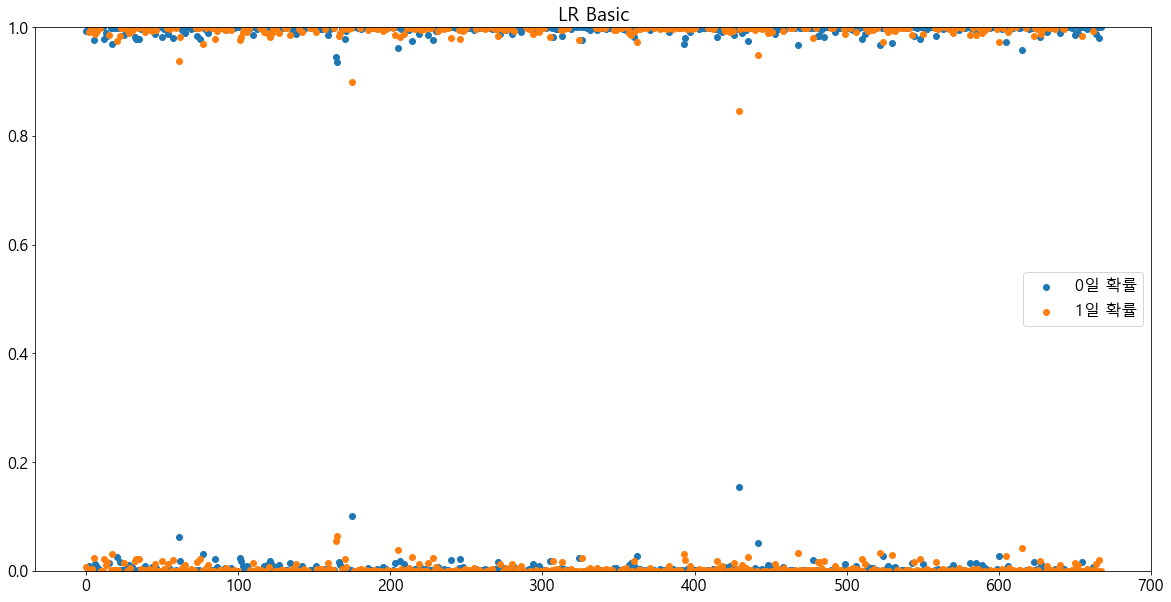

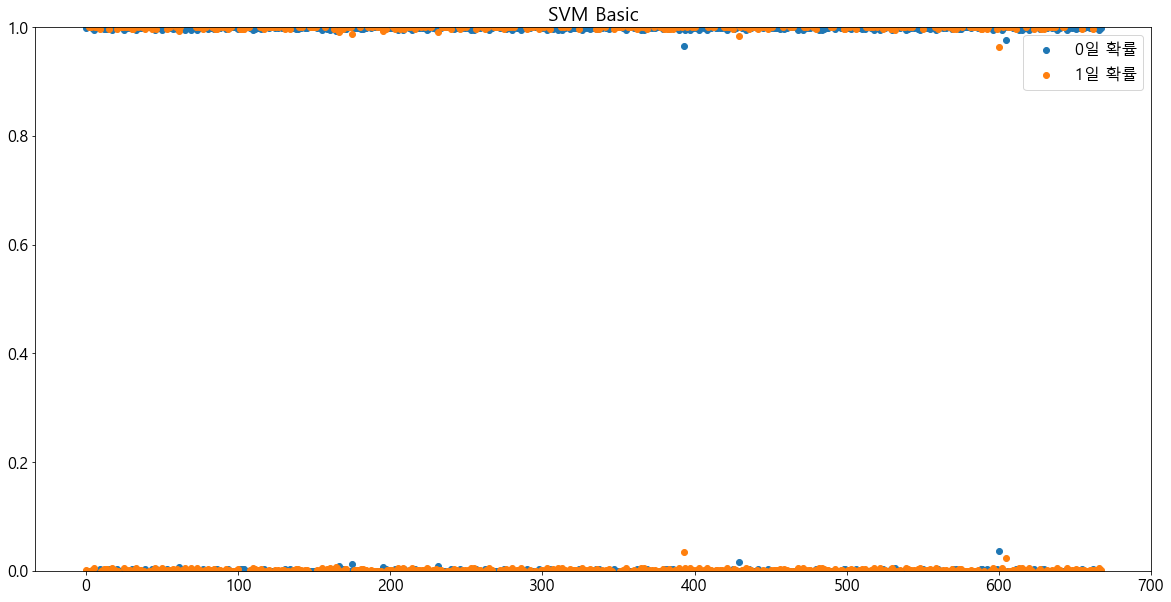

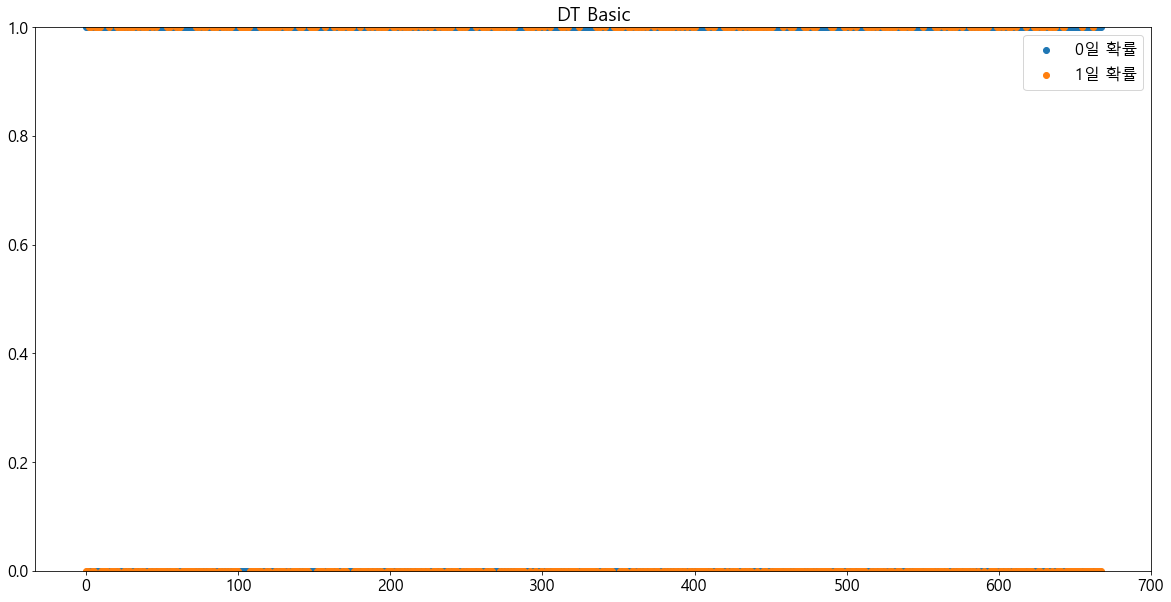

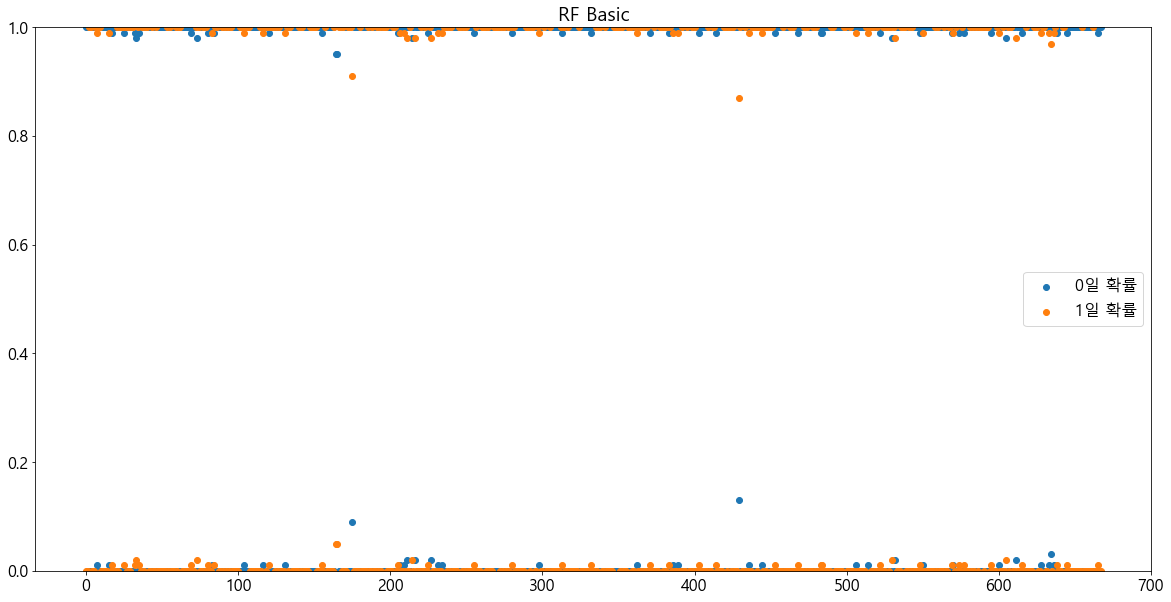

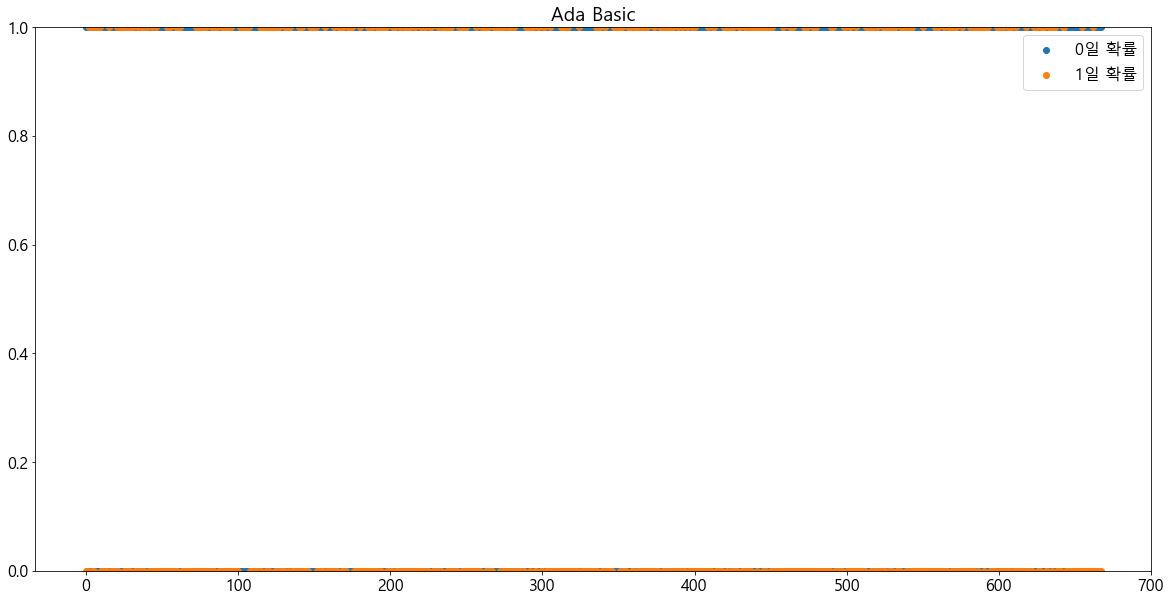

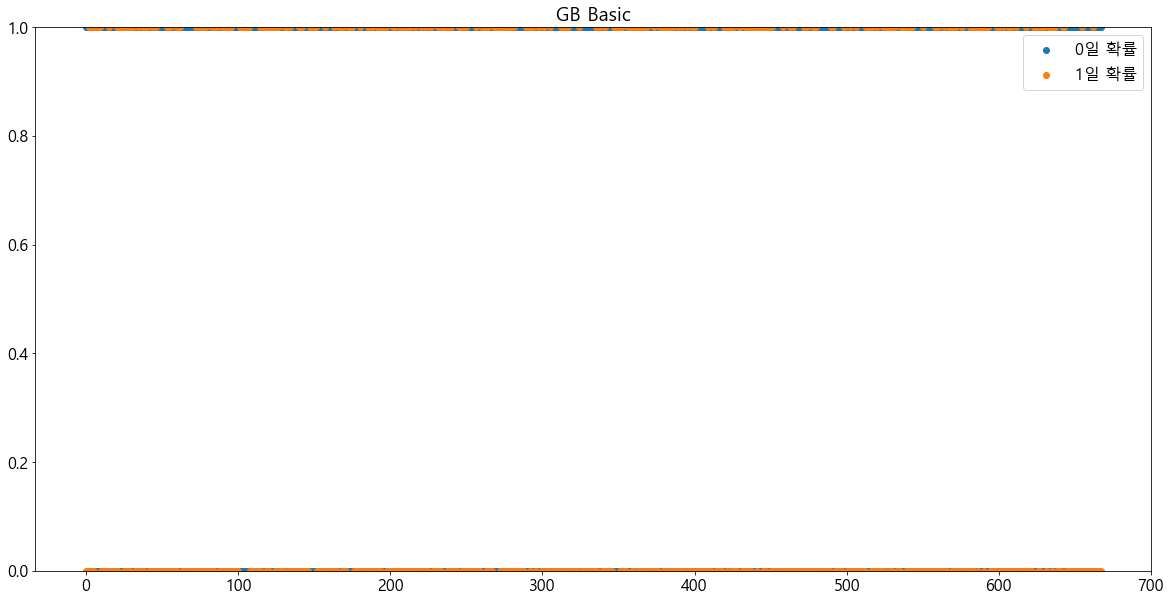

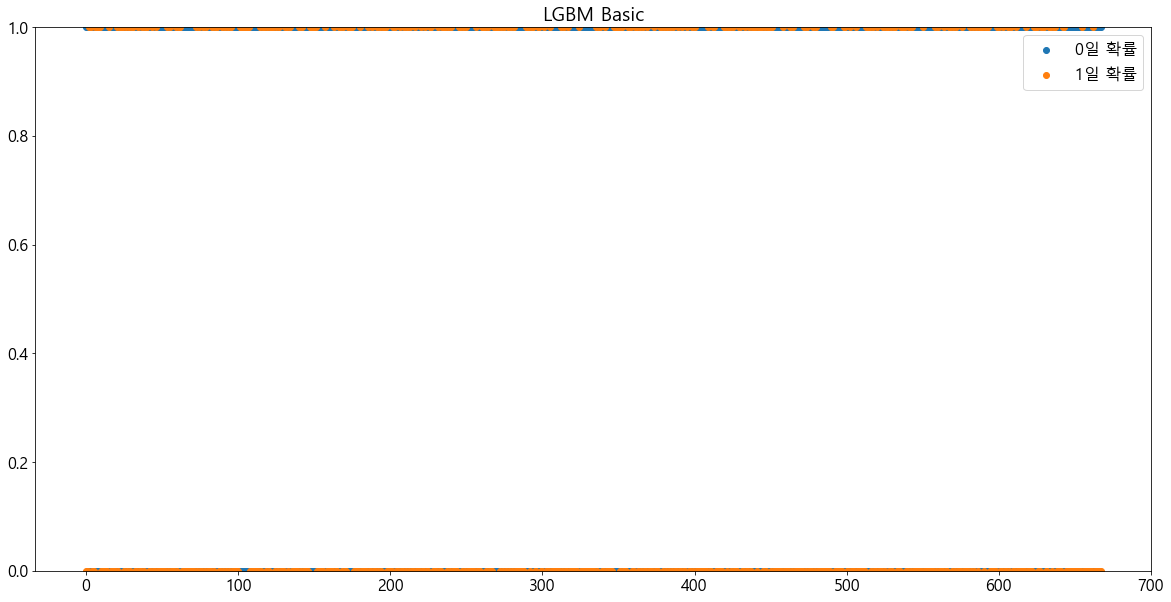

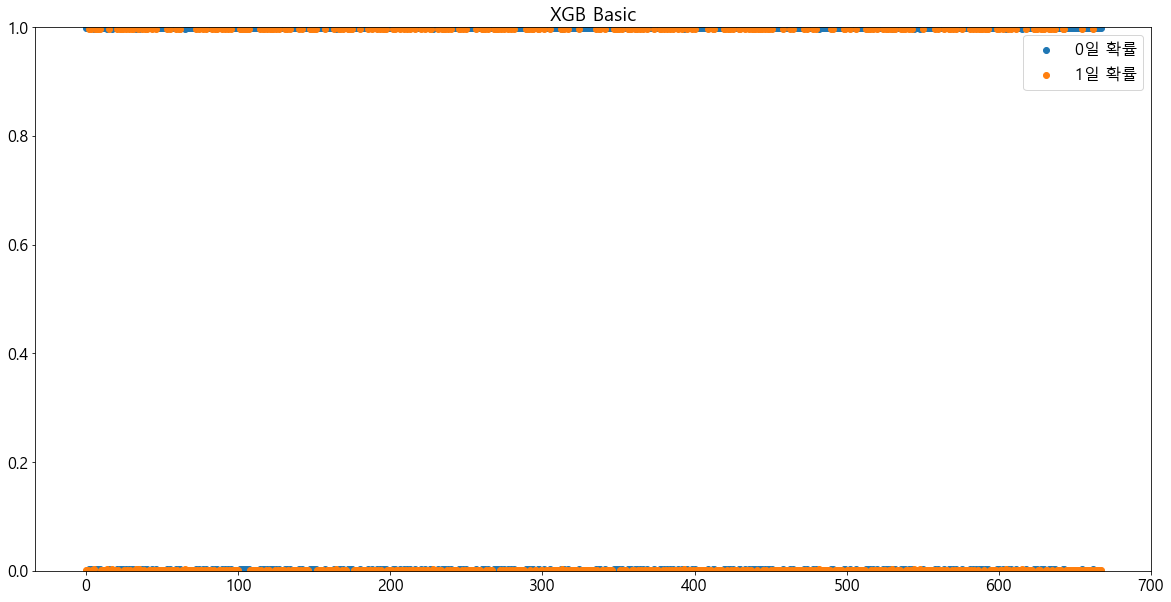

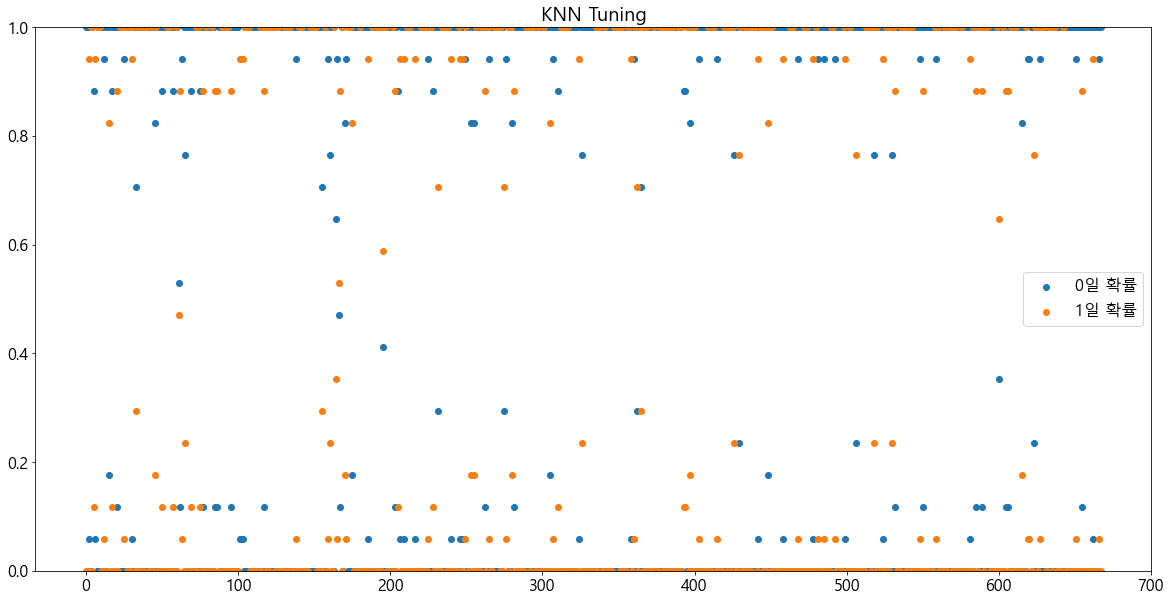

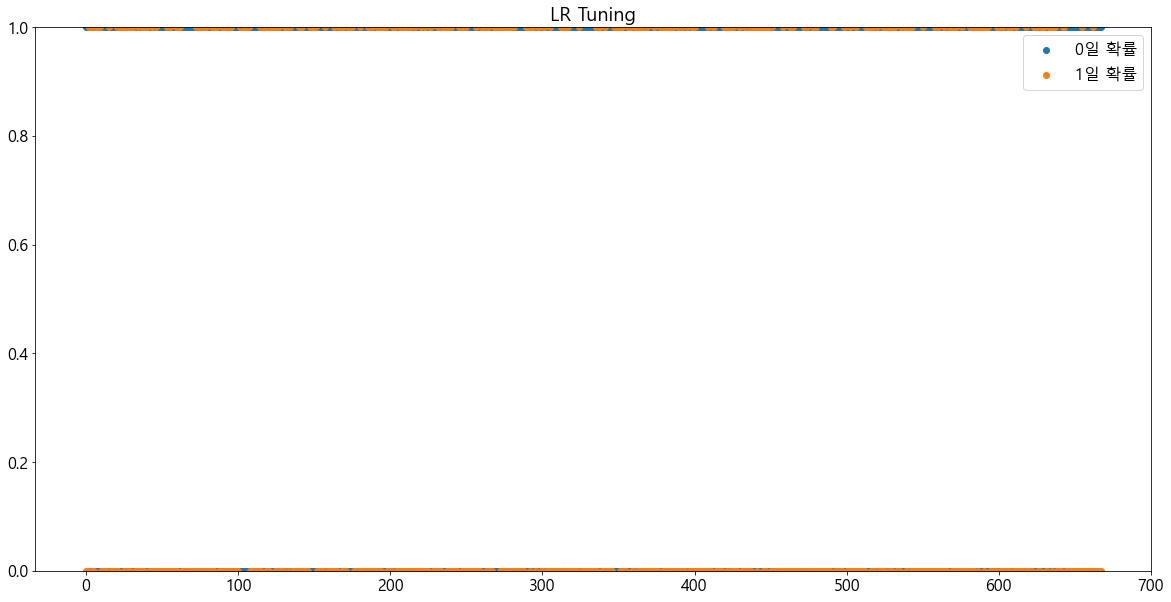

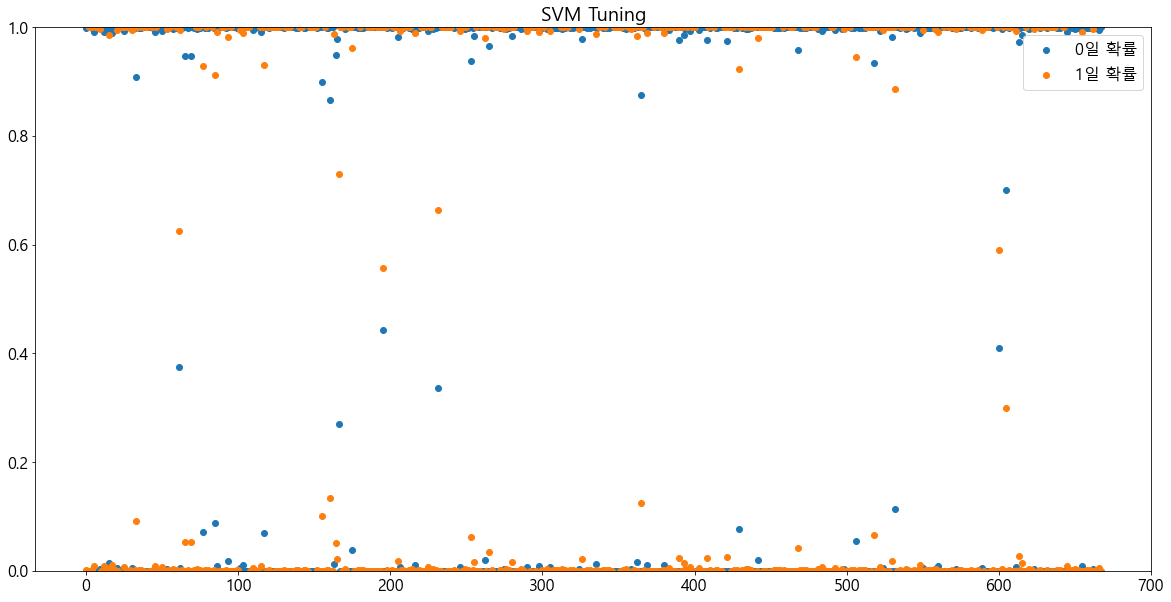

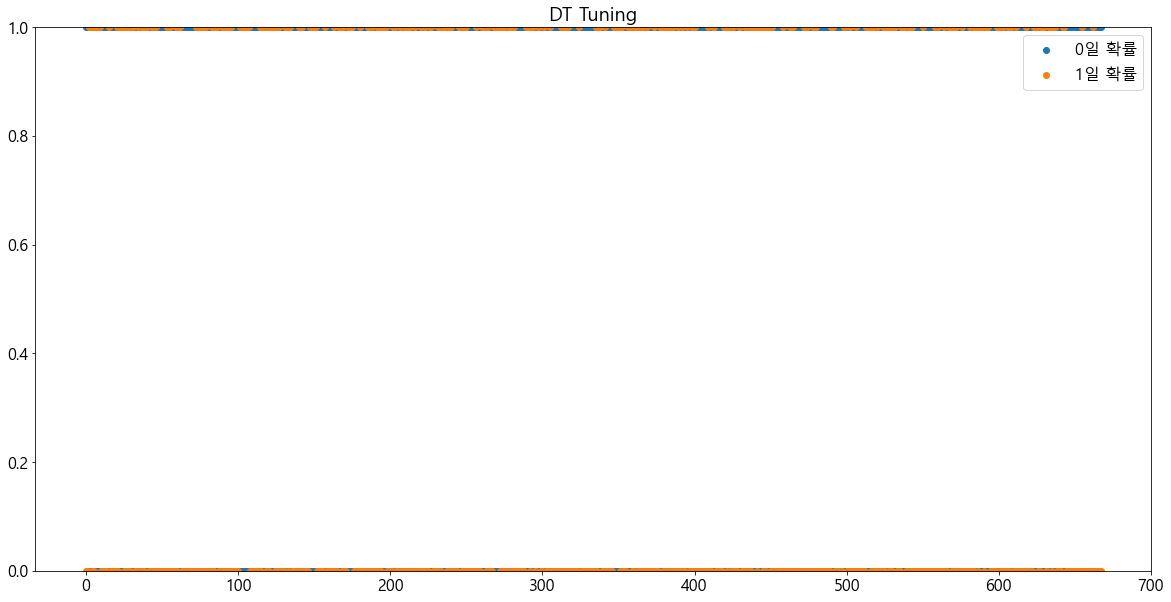

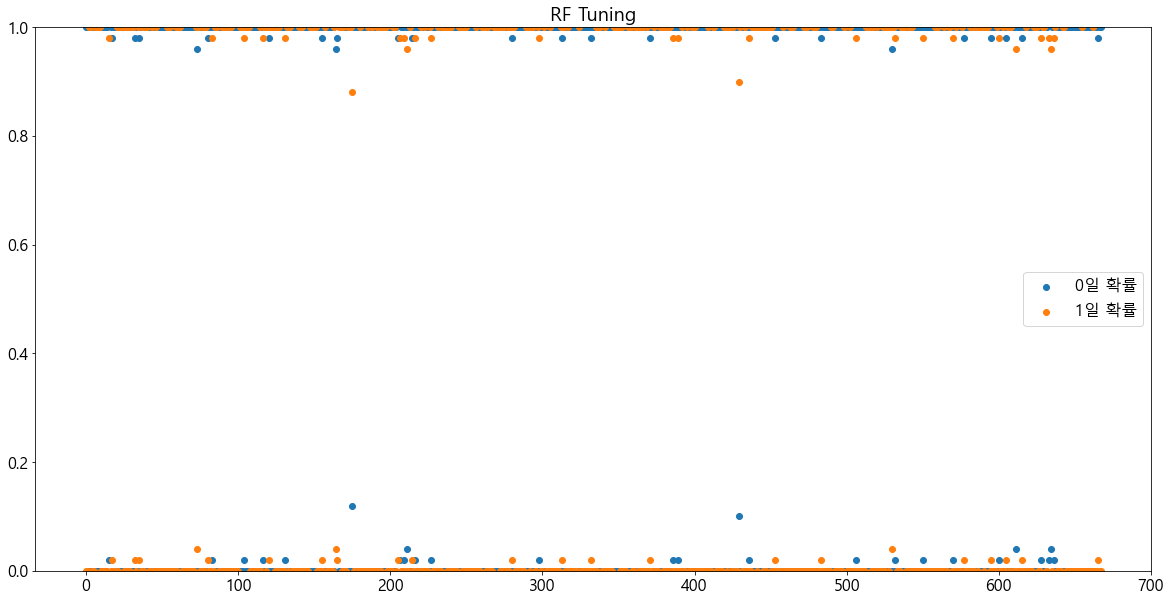

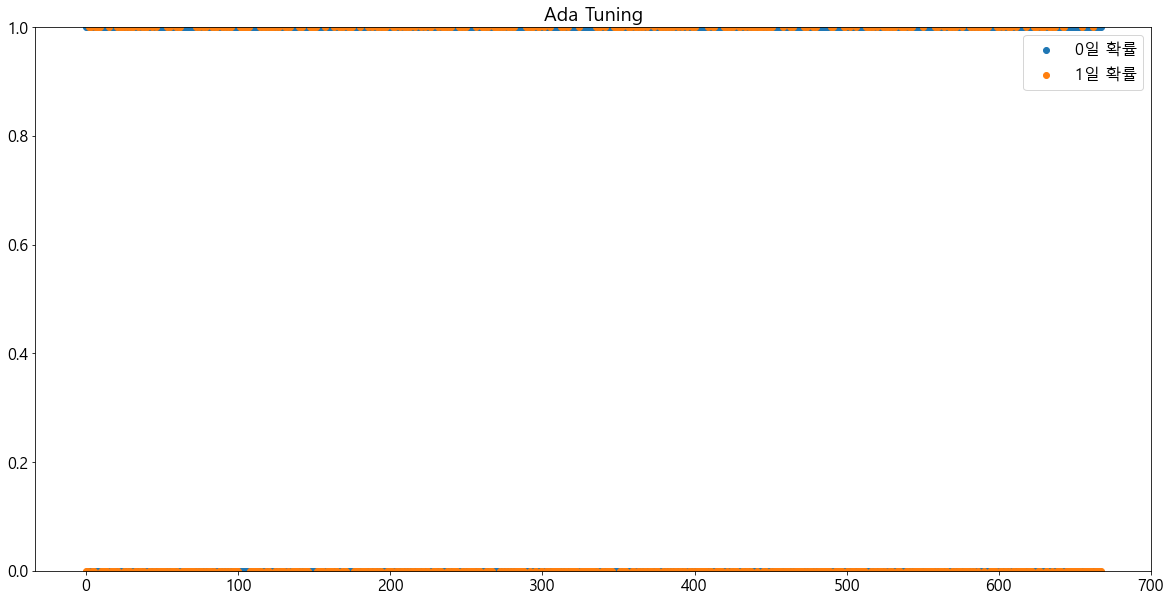

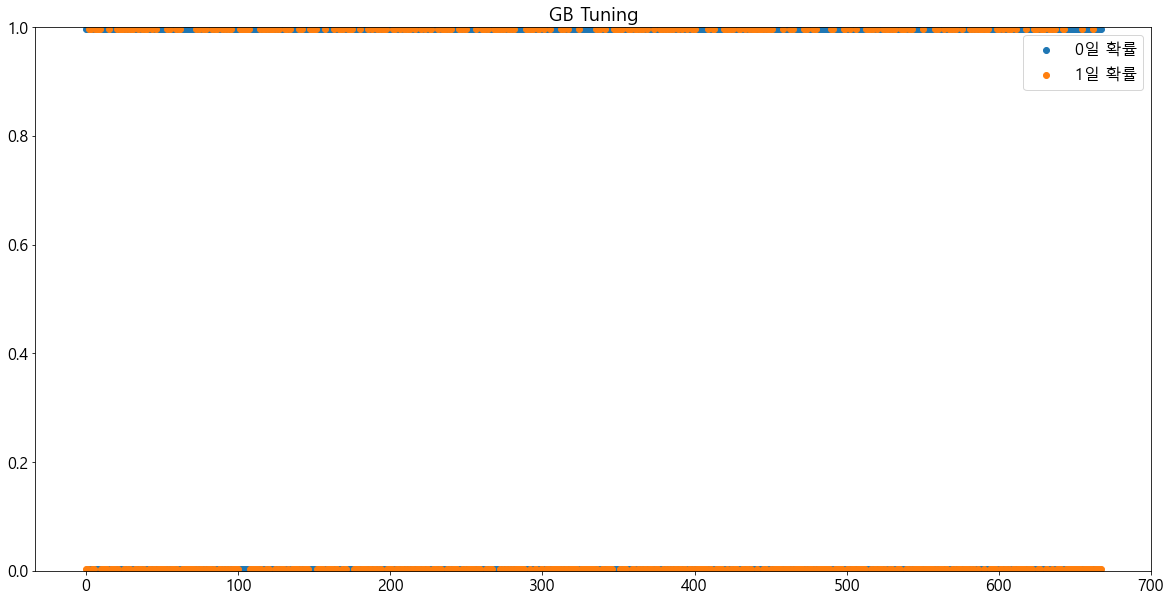

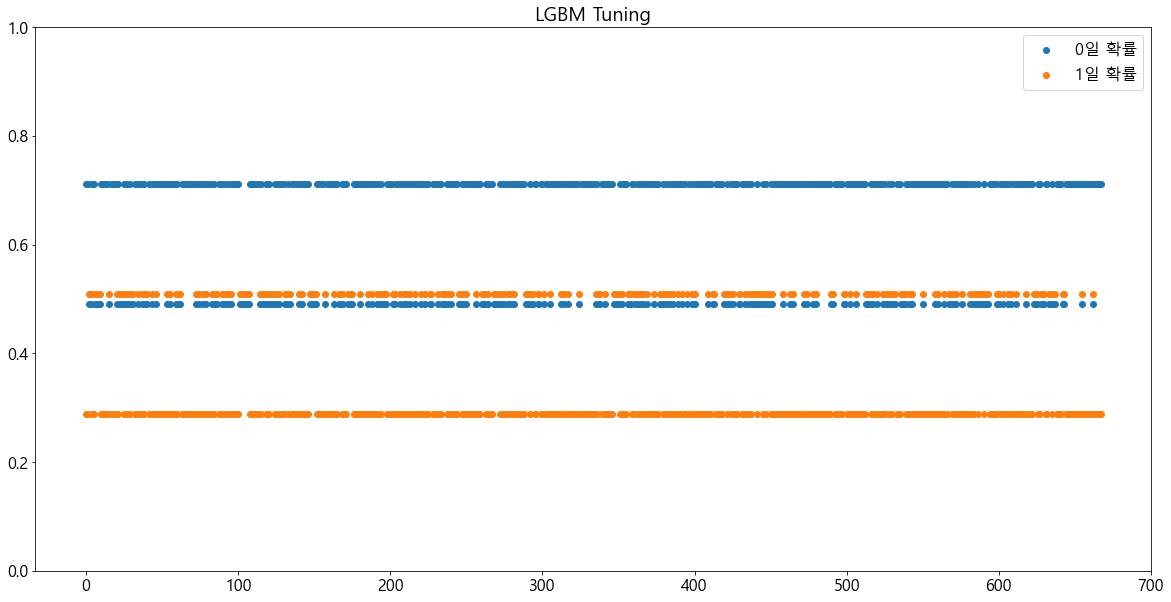

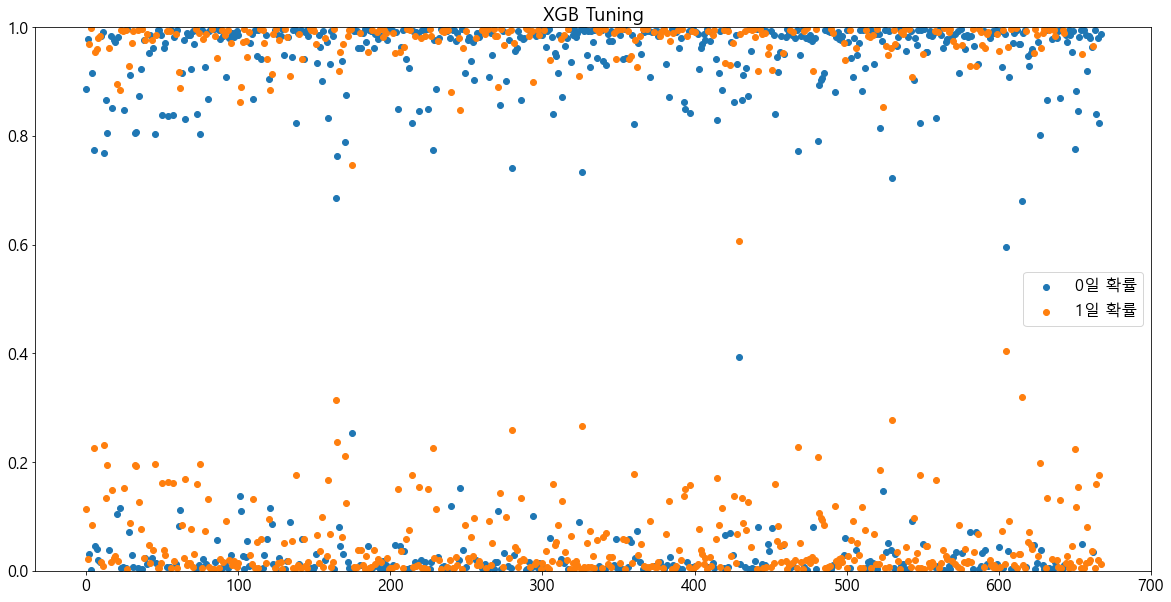

In [100]:
# 학습 데이터에 대한 확률 그래프
for idx, m1 in enumerate(total_model) :  
    proba1 = m1.predict_proba(X_train)

    # 0일 확률
    a10 = proba1[:, 0]
    # 1일 확률
    a11 = proba1[:, 1]

    plt.scatter(list(range(len(a10))), a10, label='0일 확률')
    plt.scatter(list(range(len(a11))), a11, label='1일 확률')
    plt.title(result_name[idx])
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

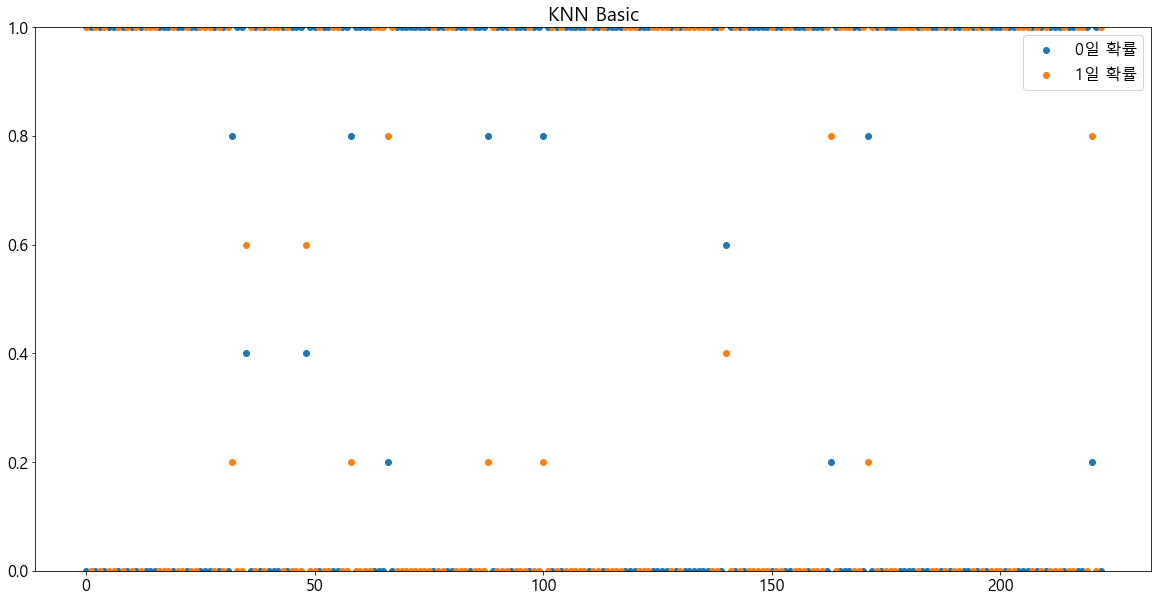

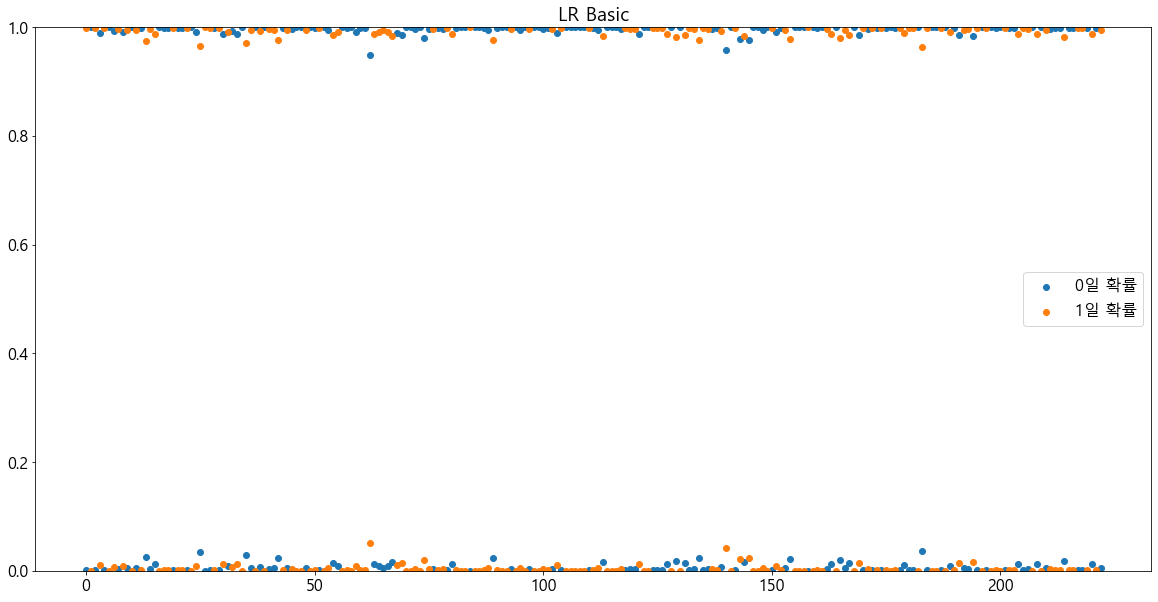

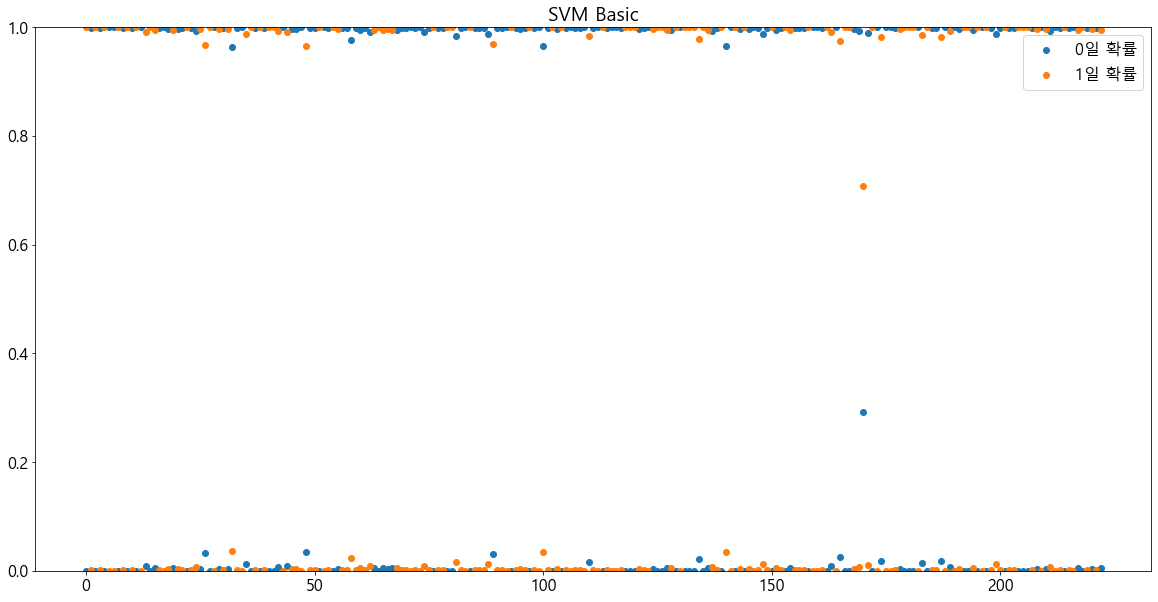

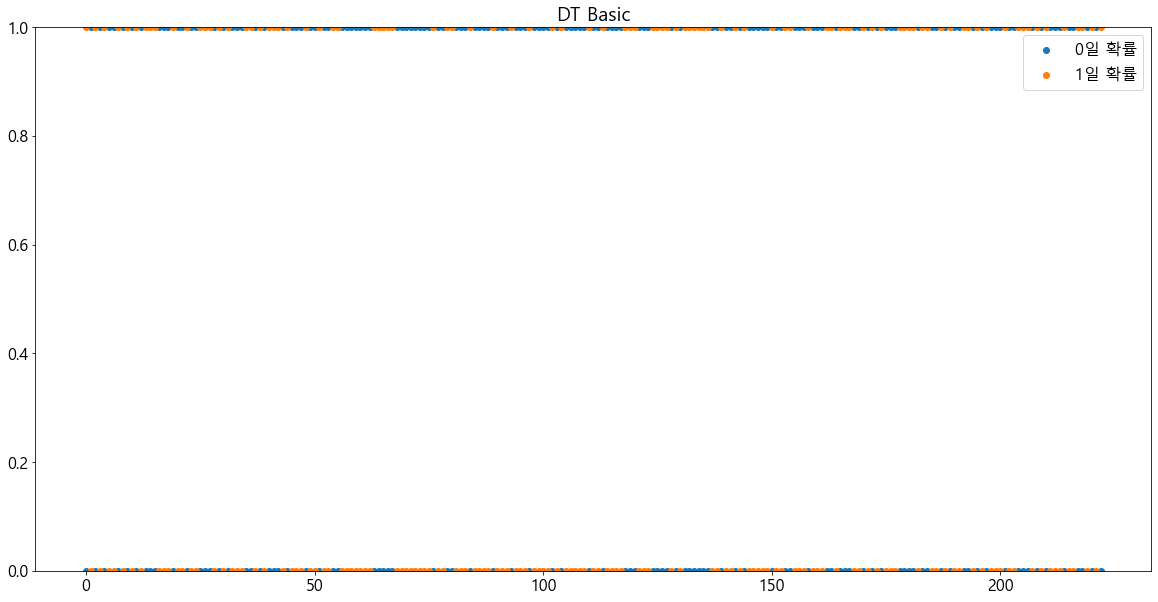

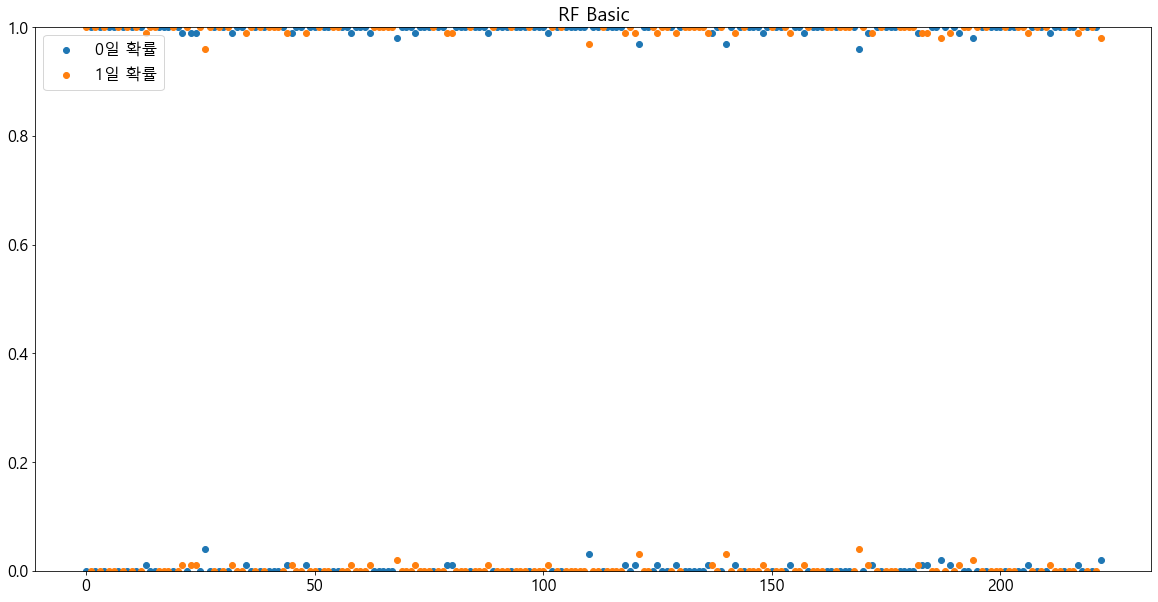

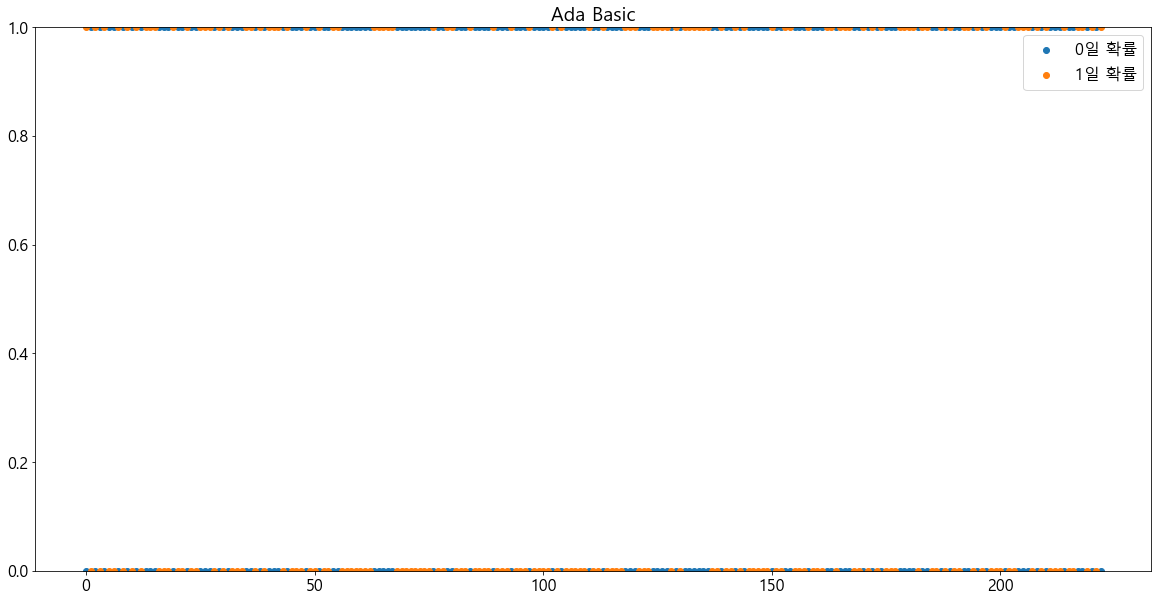

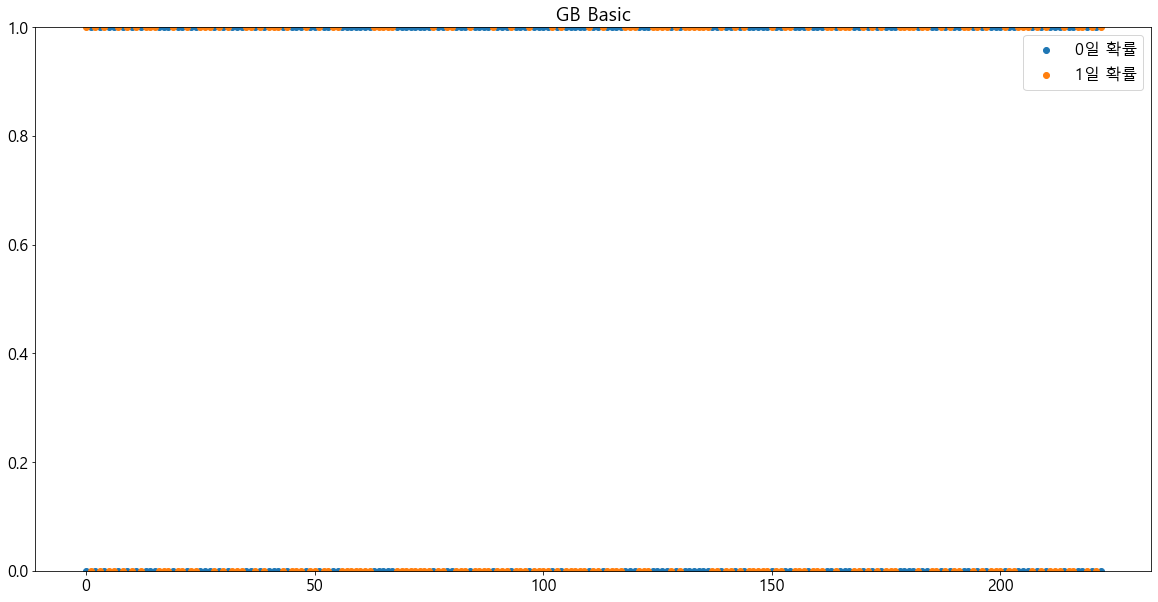

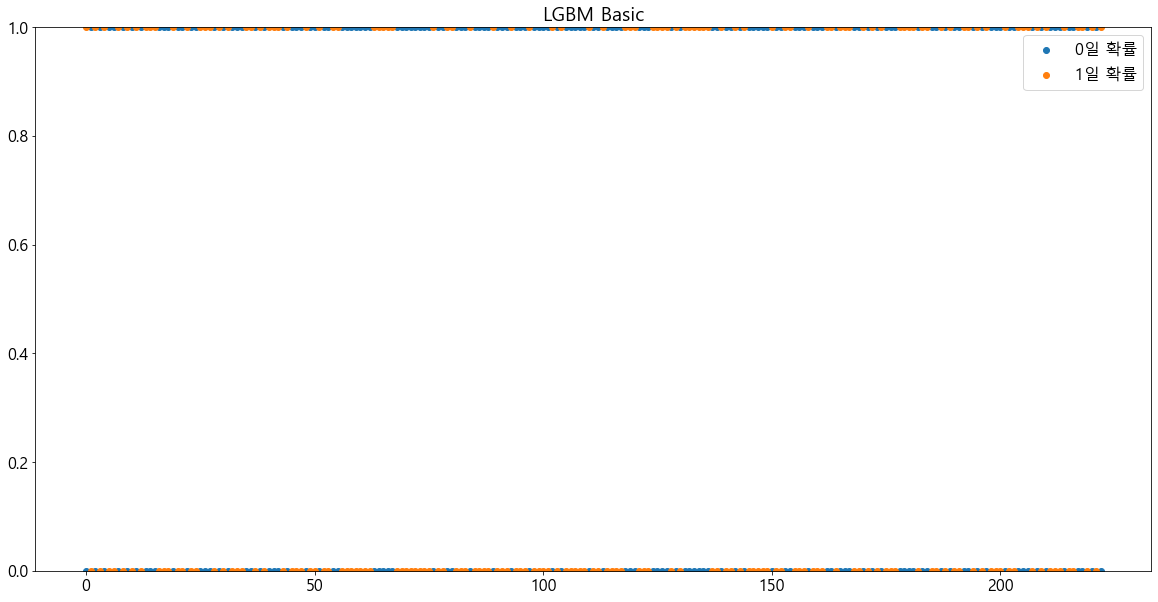

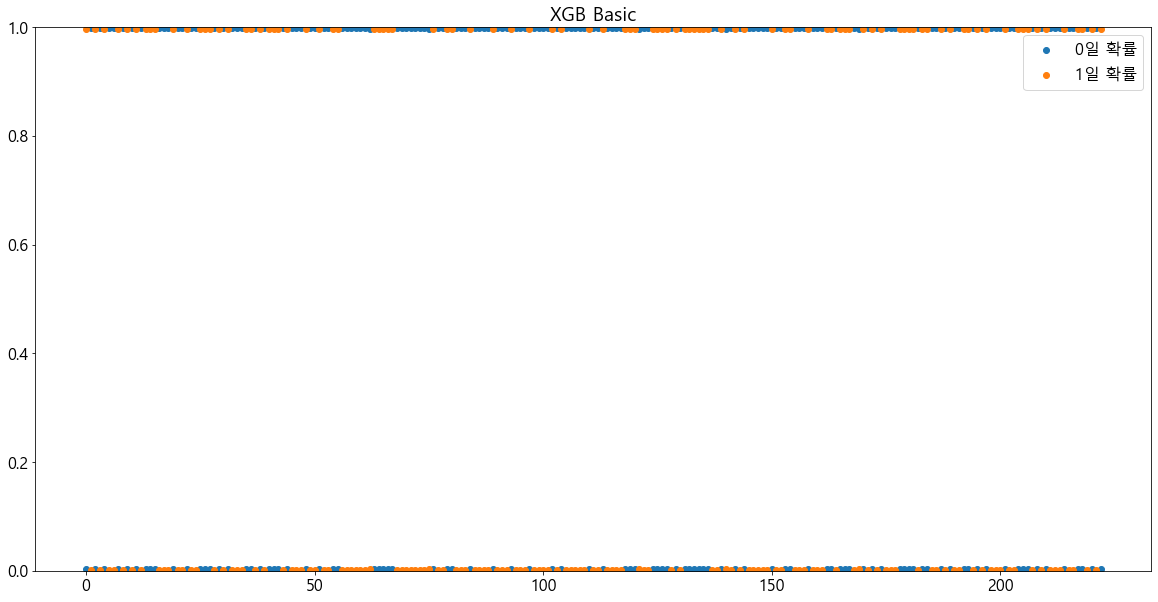

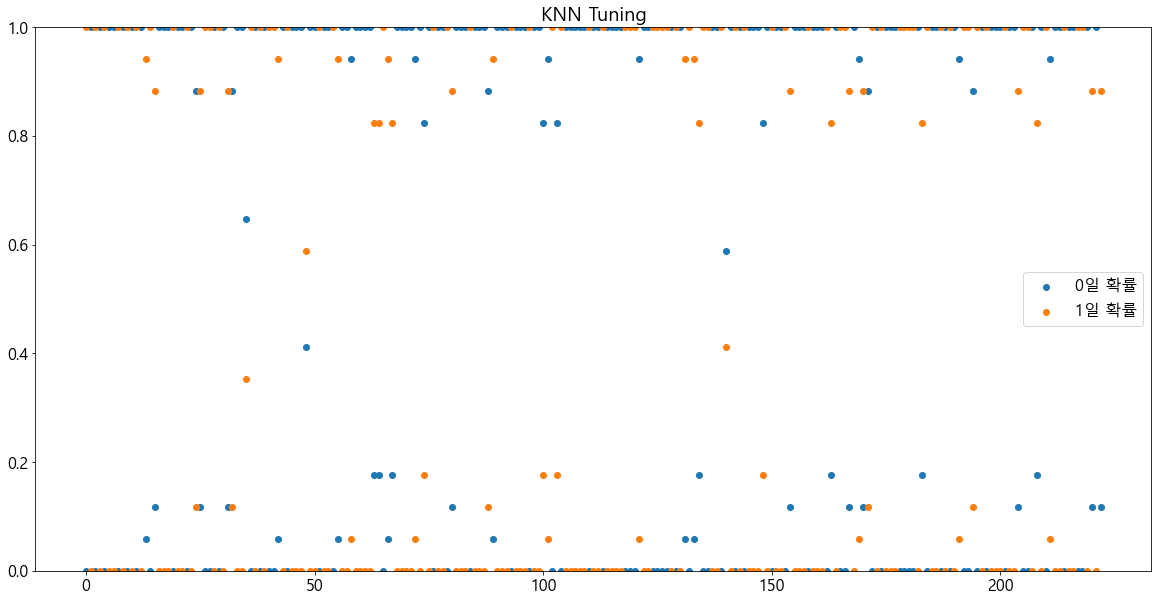

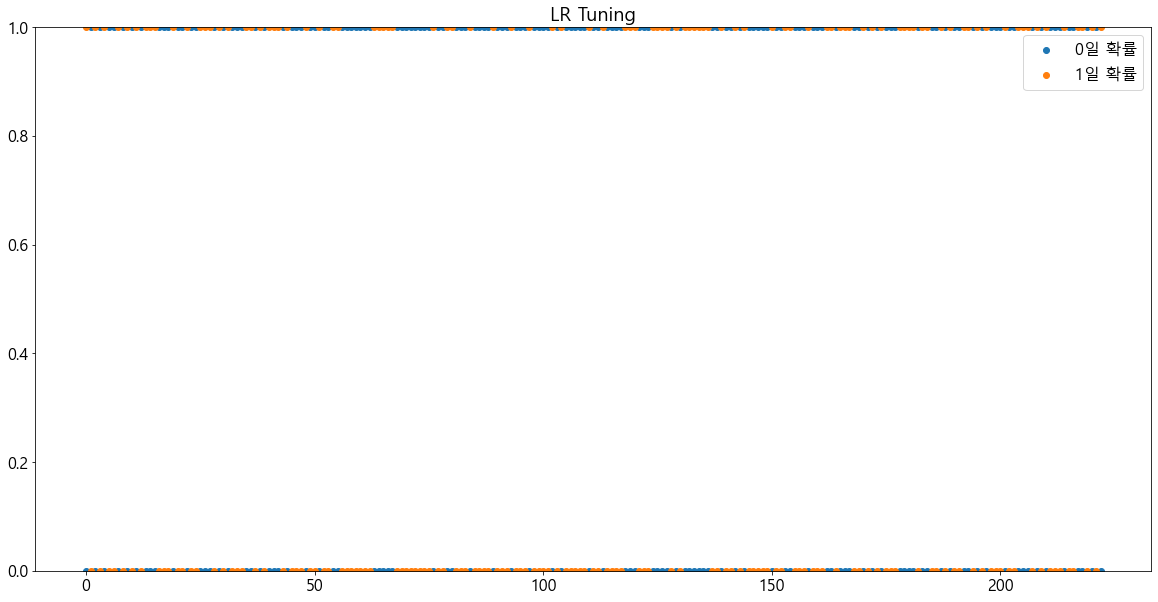

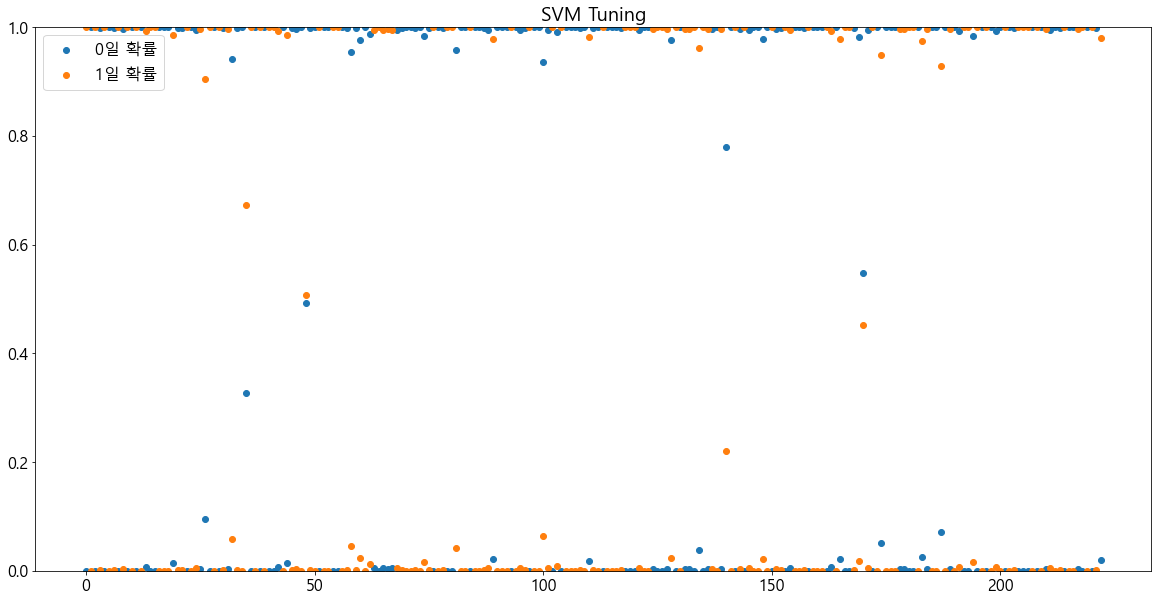

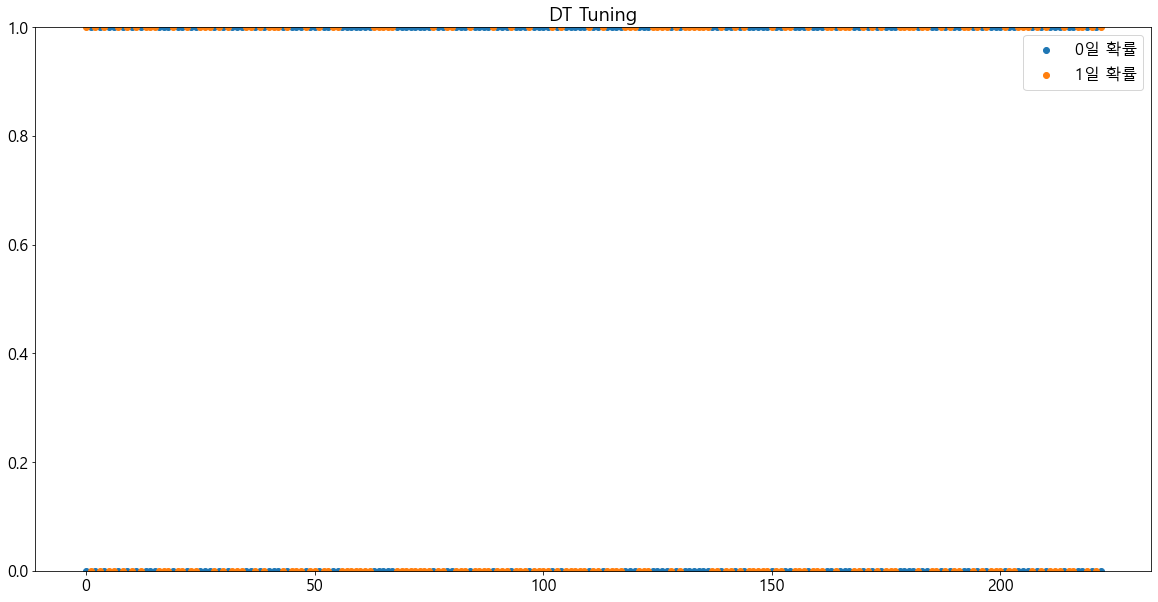

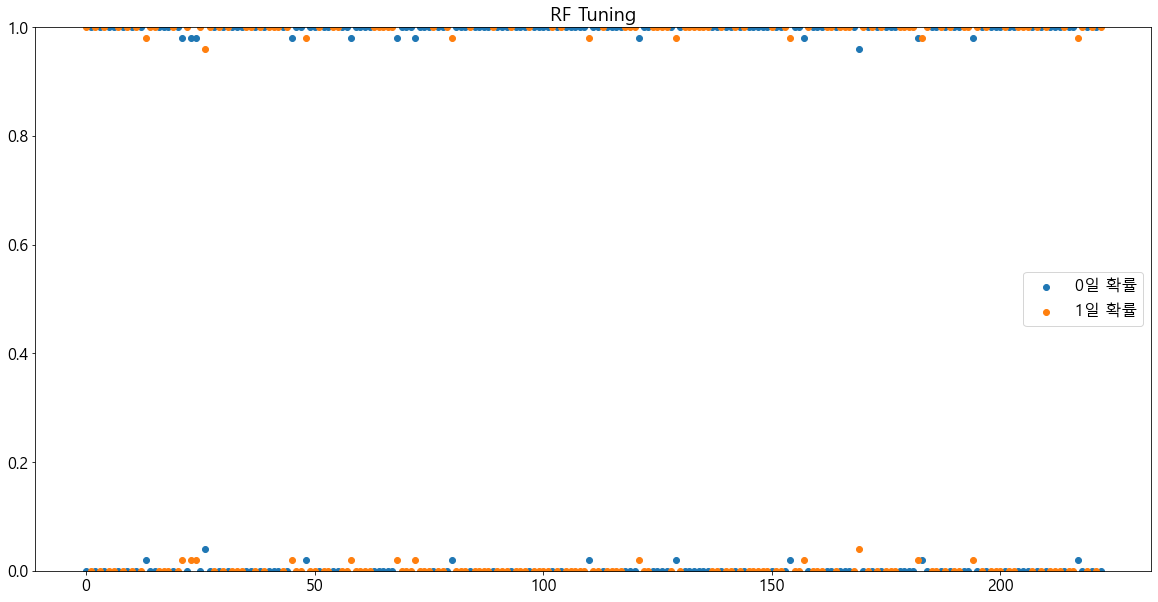

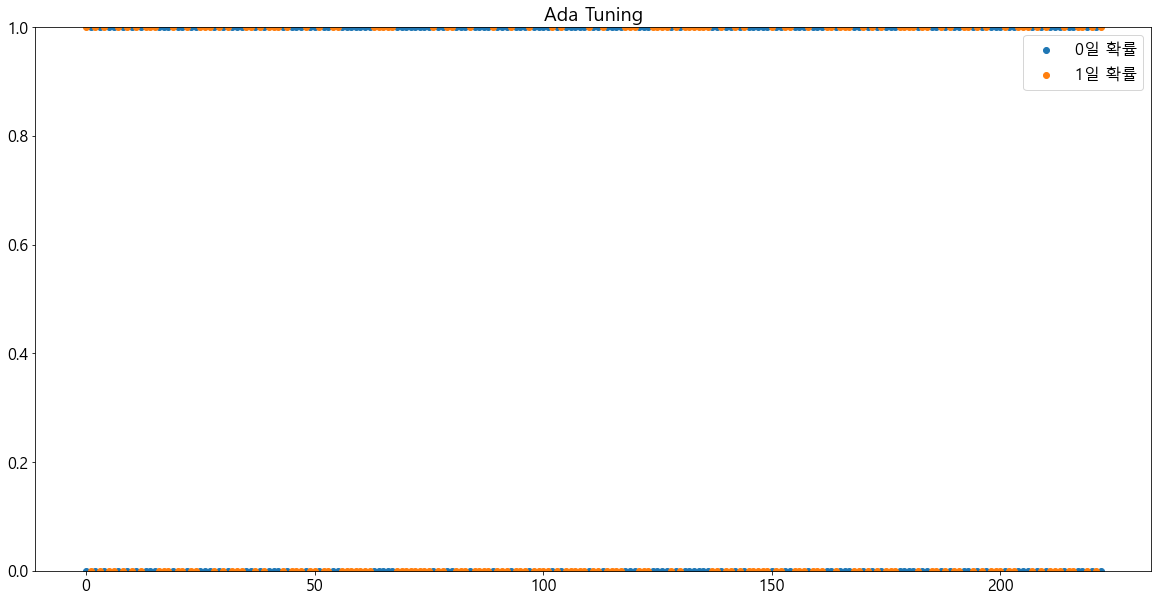

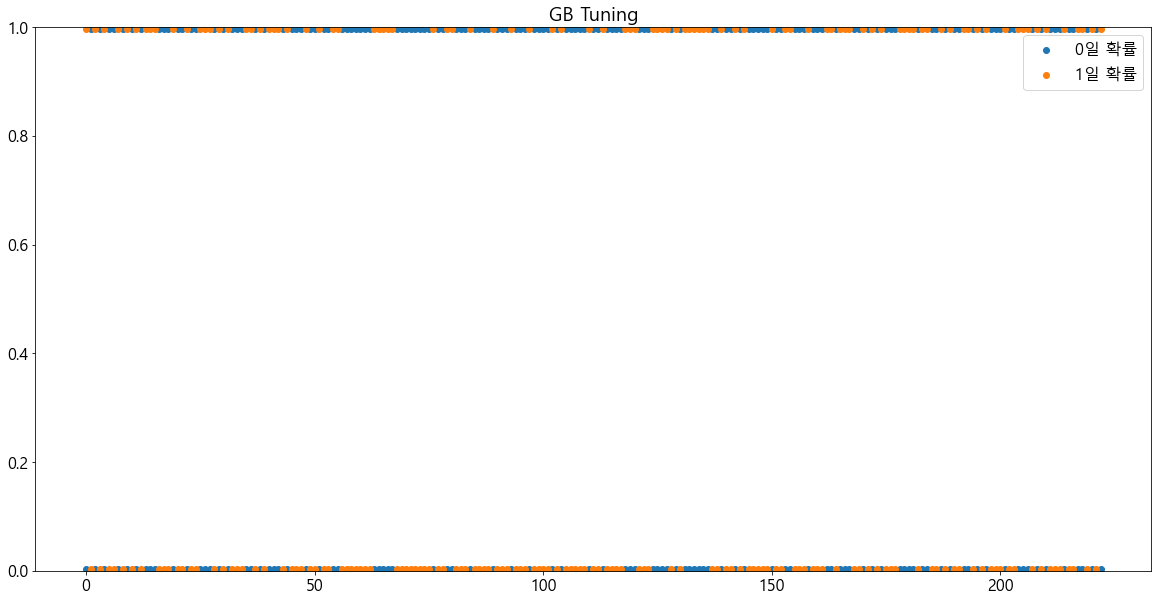

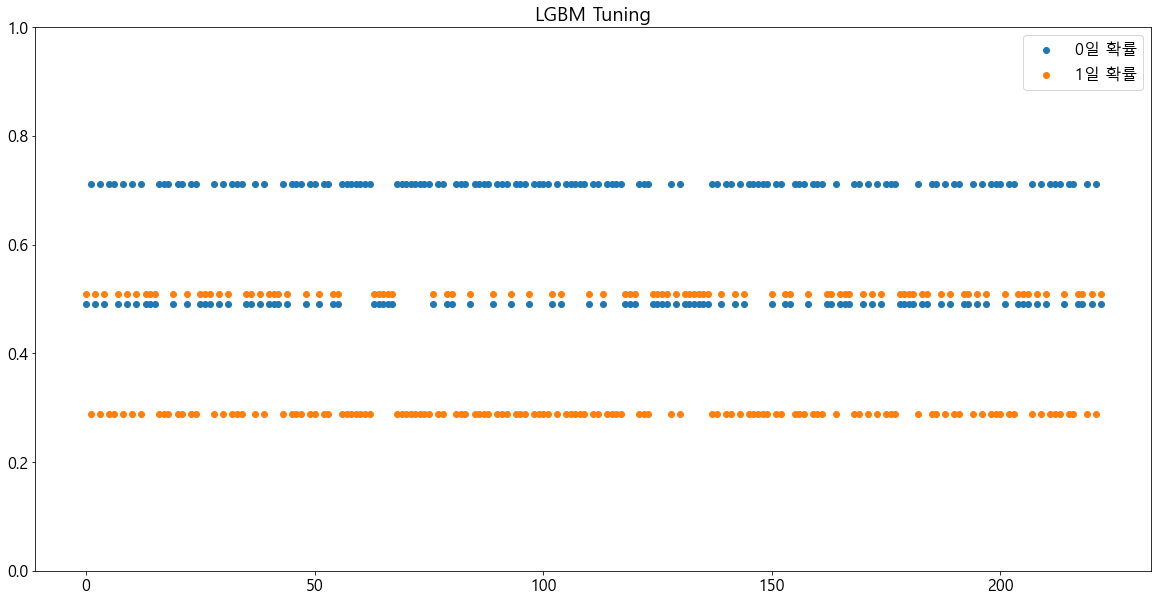

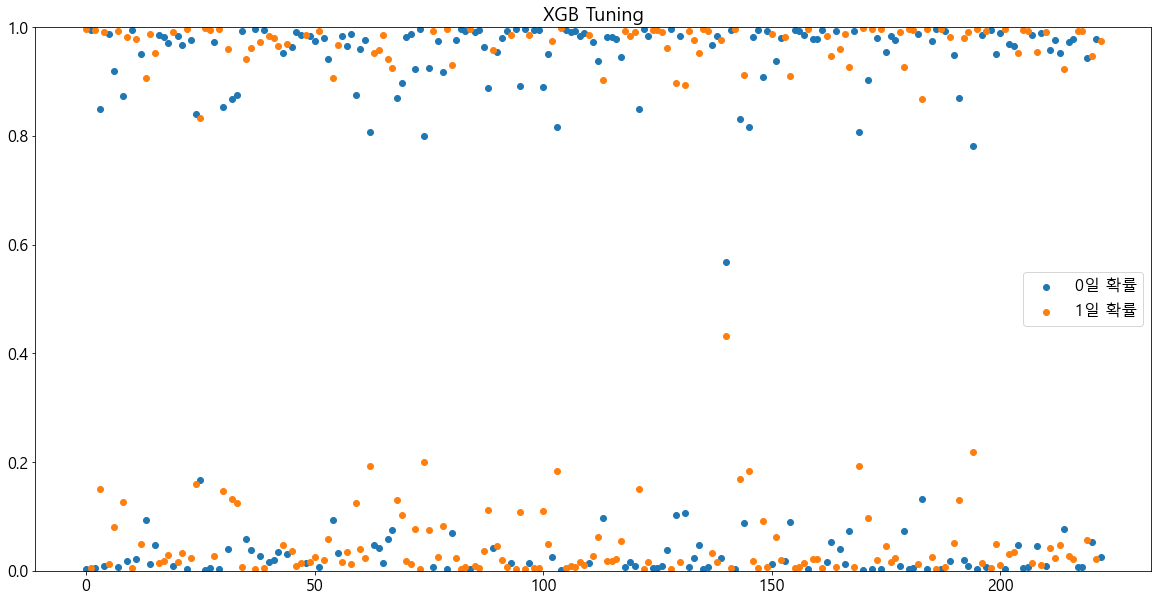

In [101]:
# 검증 데이터에 대한 확률 그래프
for idx, m1 in enumerate(total_model) :  
    proba1 = m1.predict_proba(X_test)

    # 0일 확률
    a10 = proba1[:, 0]
    # 1일 확률
    a11 = proba1[:, 1]

    plt.scatter(list(range(len(a10))), a10, label='0일 확률')
    plt.scatter(list(range(len(a11))), a11, label='1일 확률')
    plt.title(result_name[idx])
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

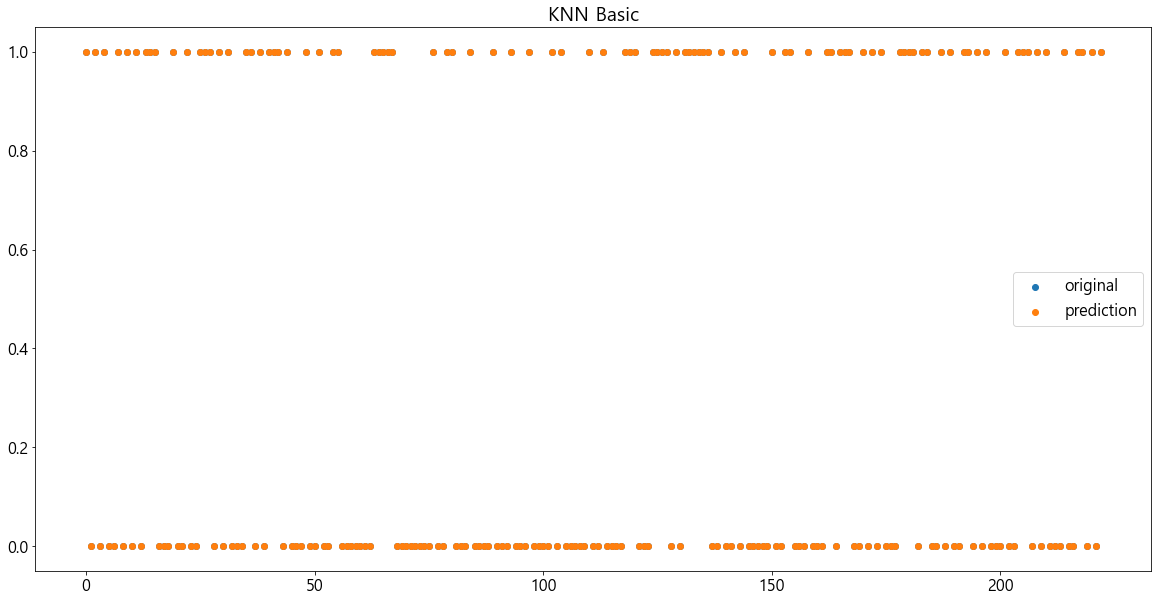

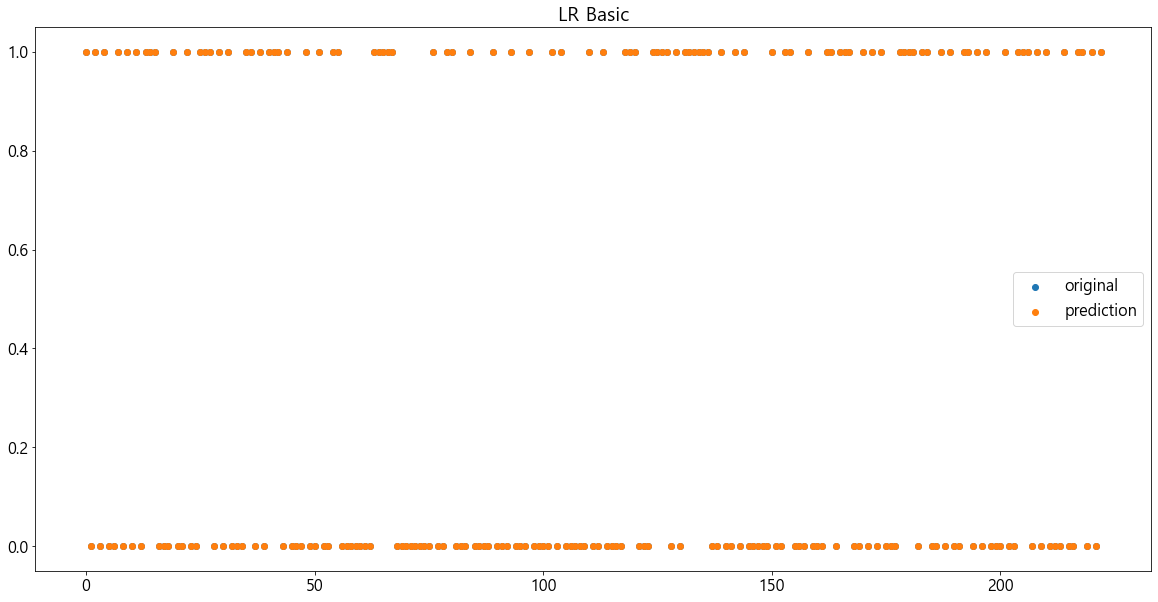

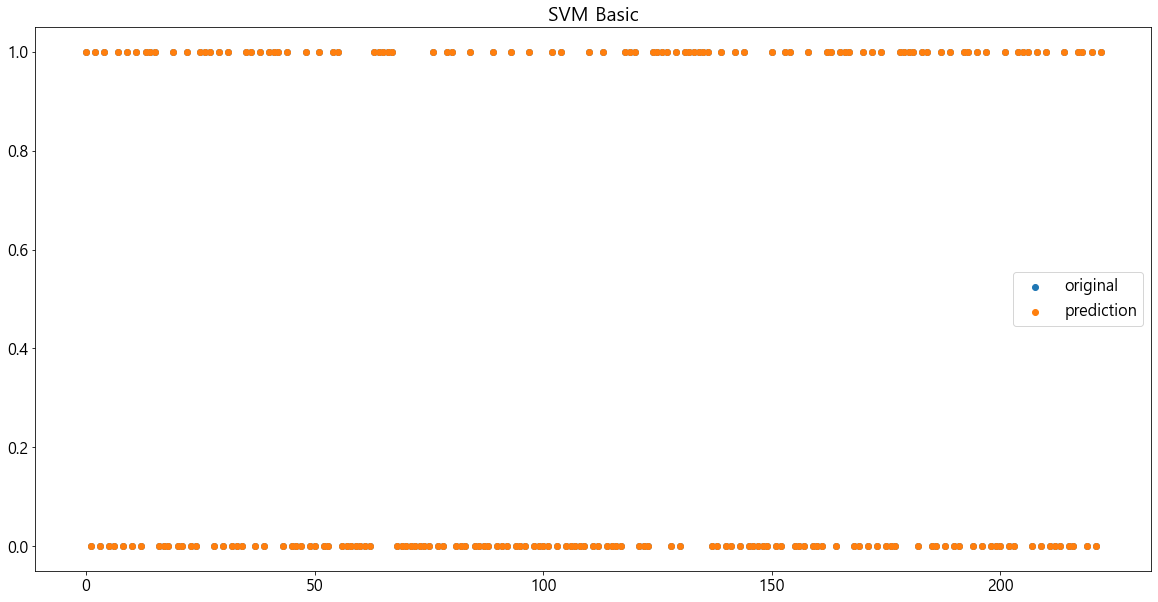

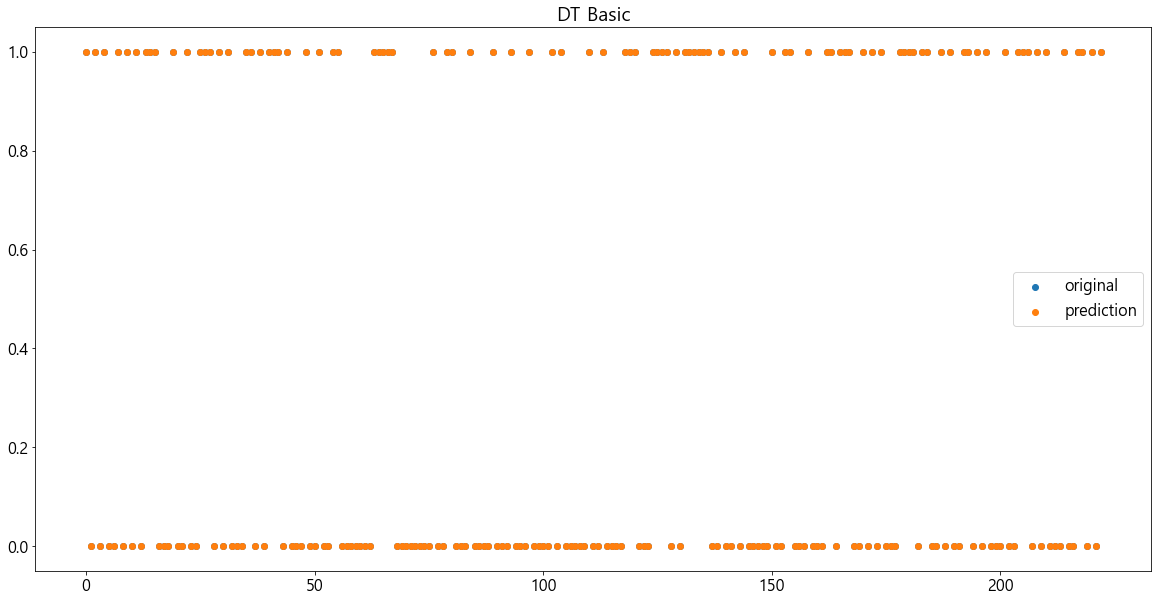

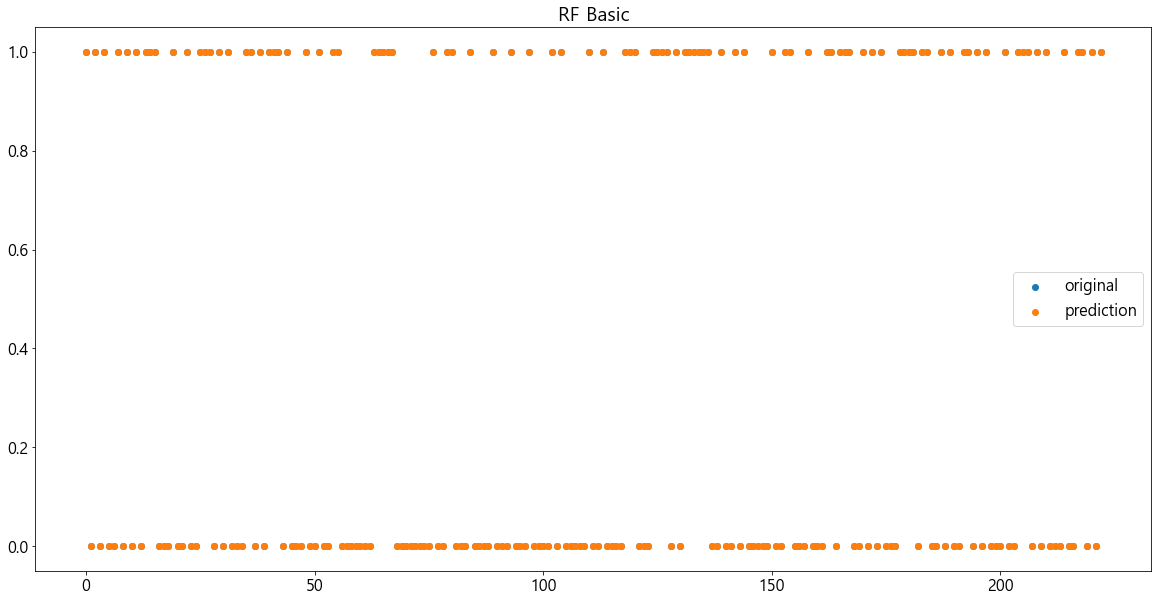

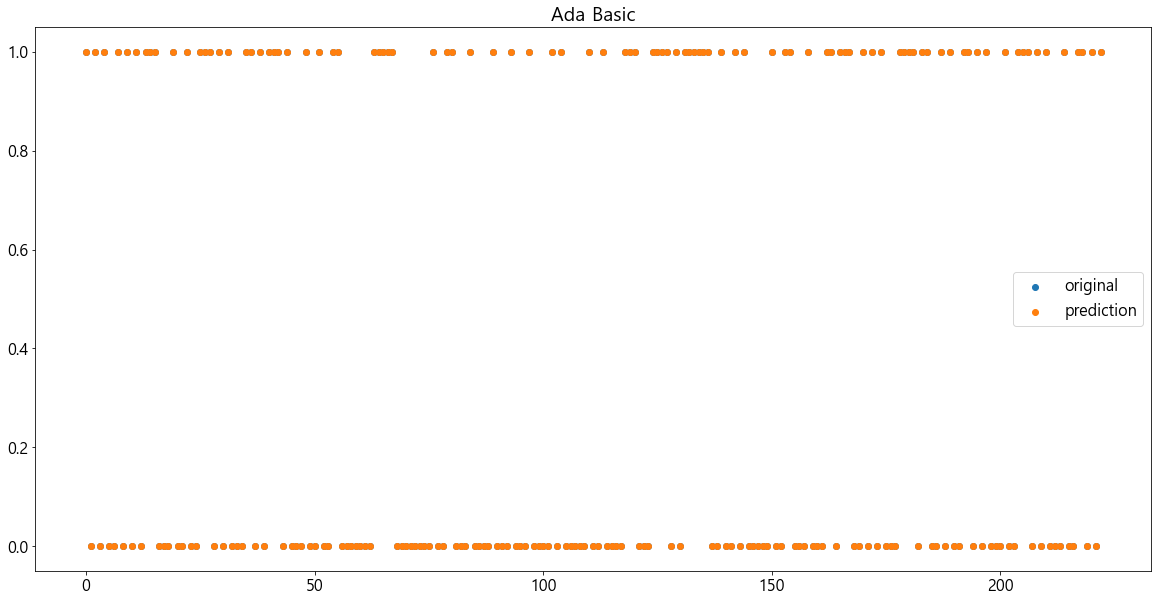

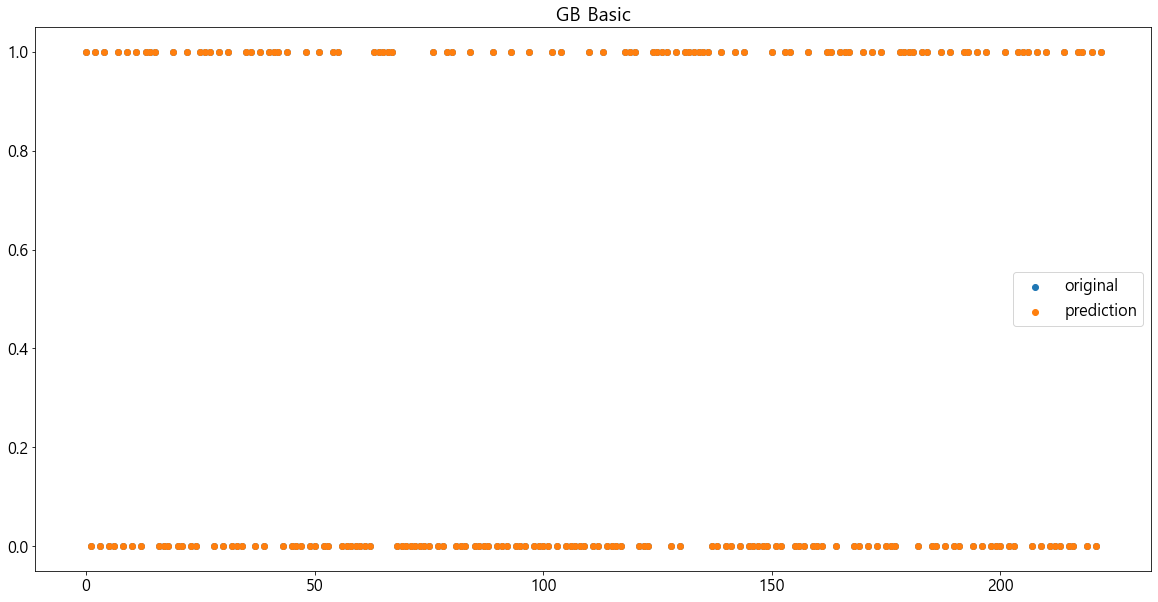

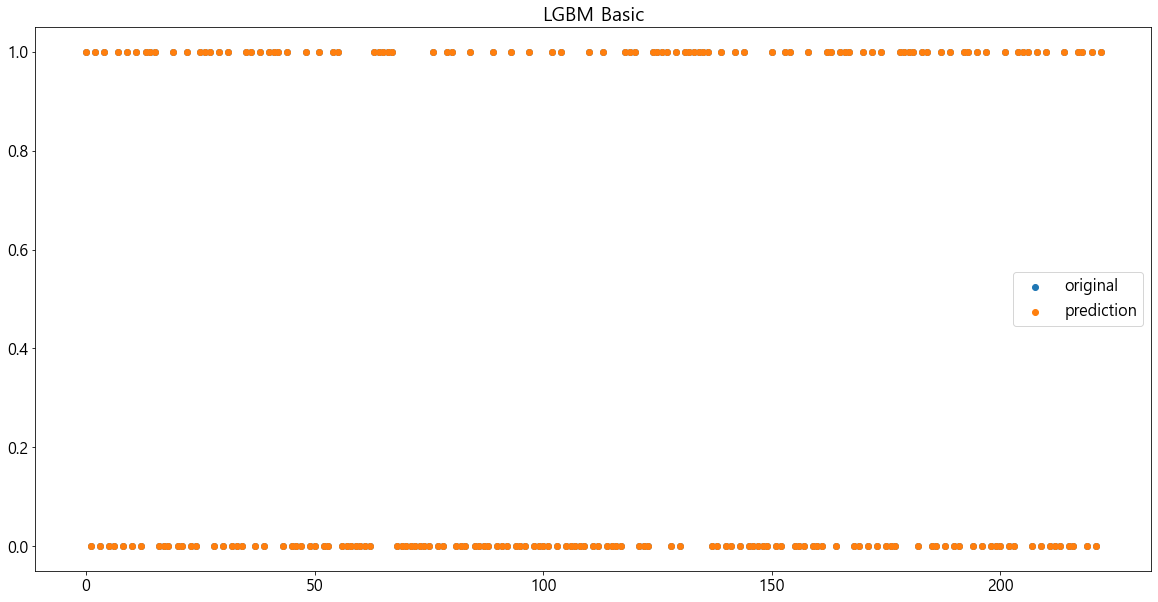

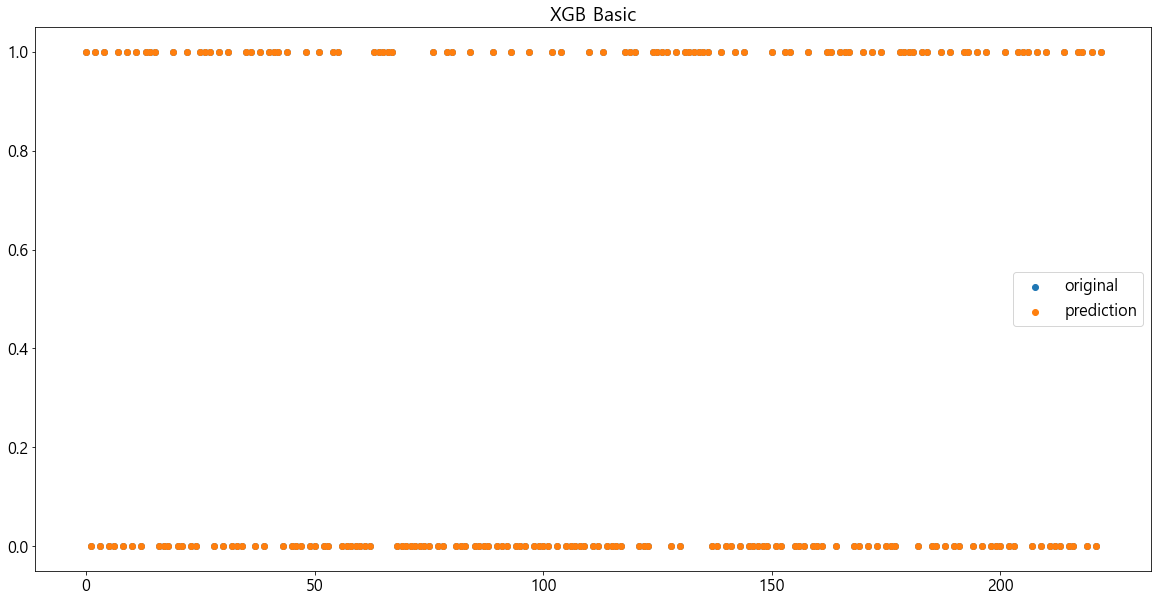

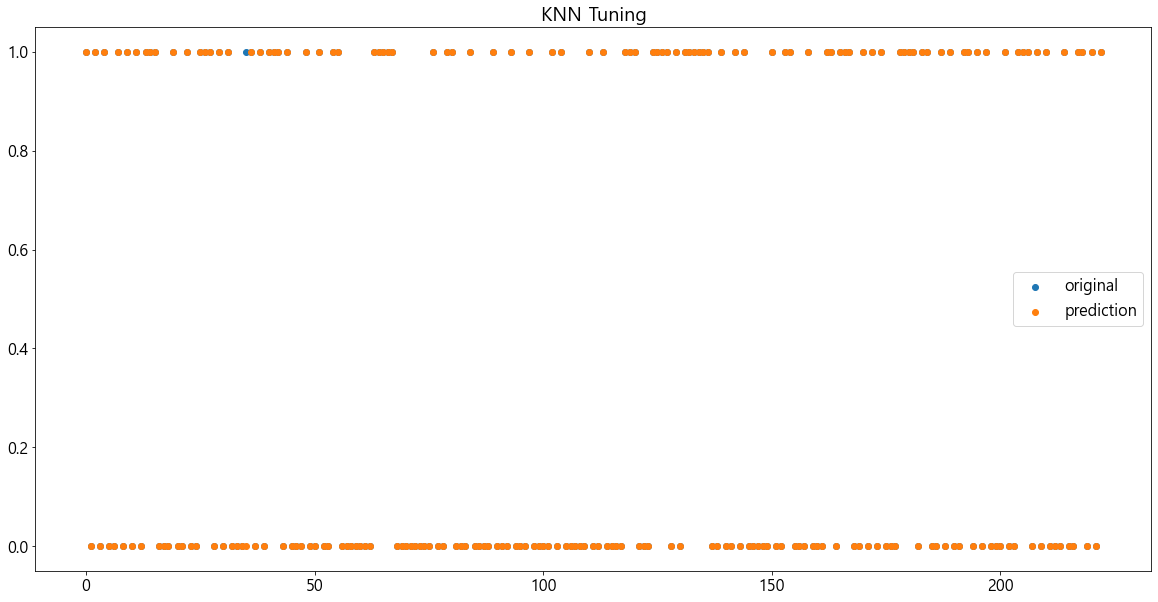

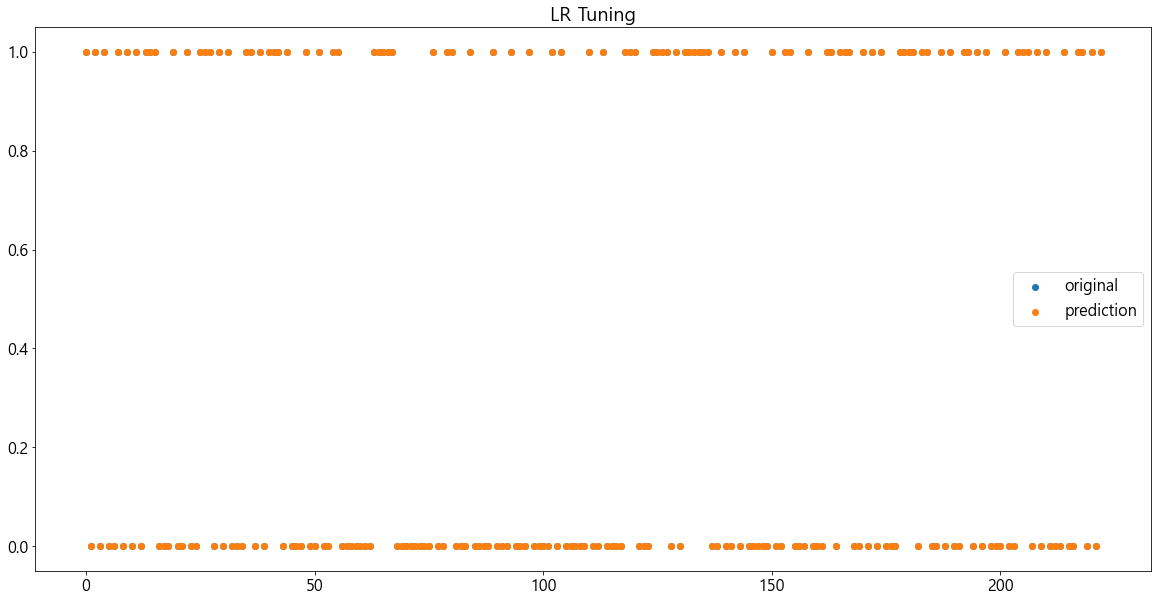

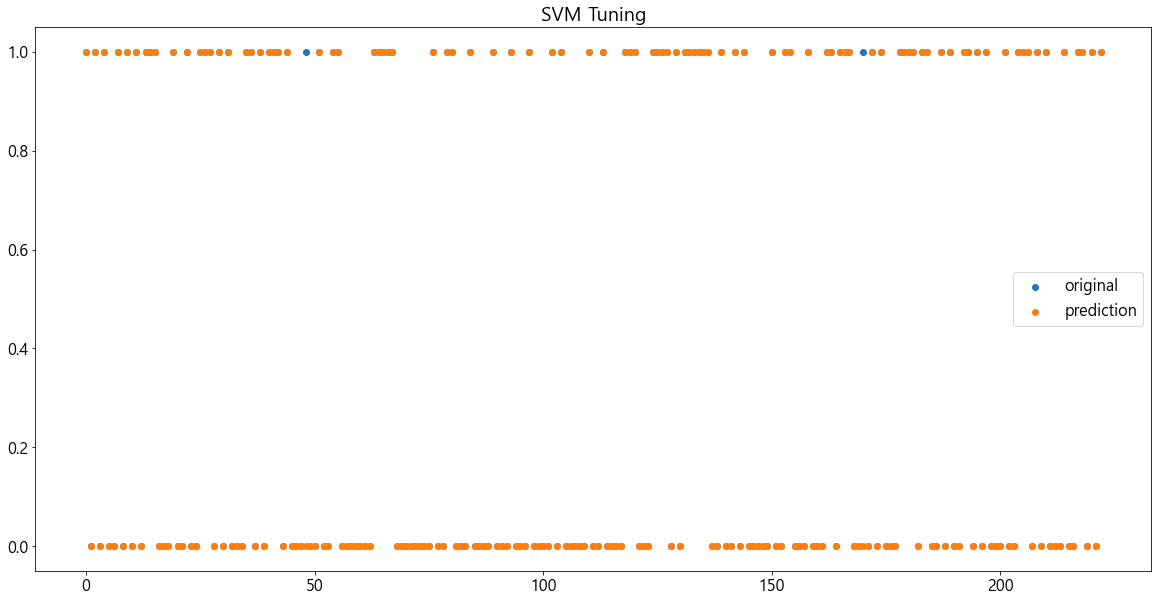

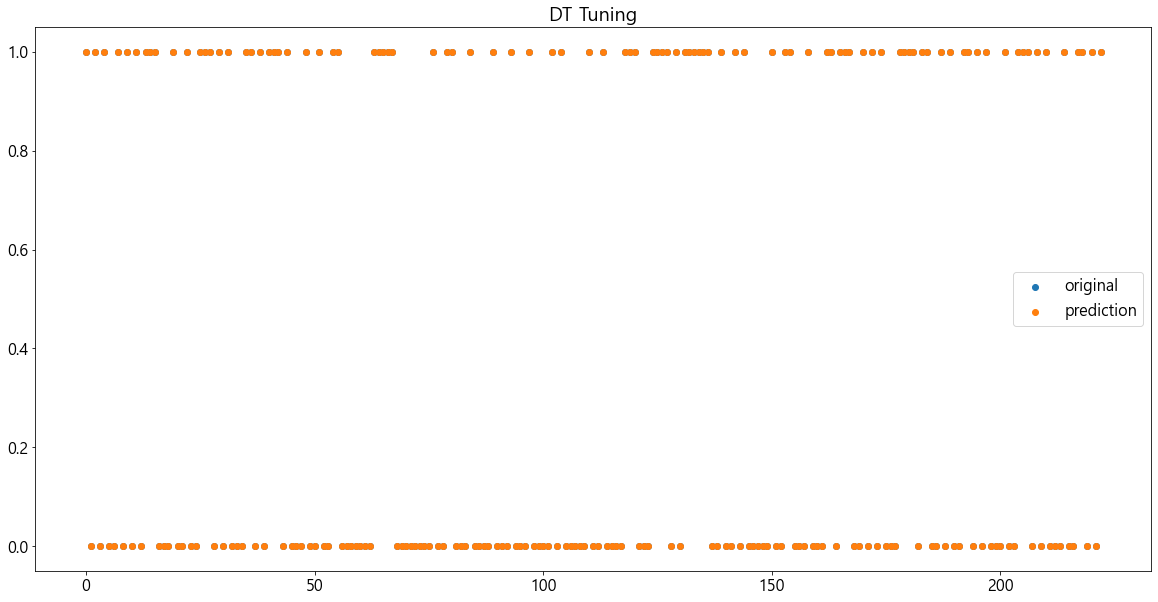

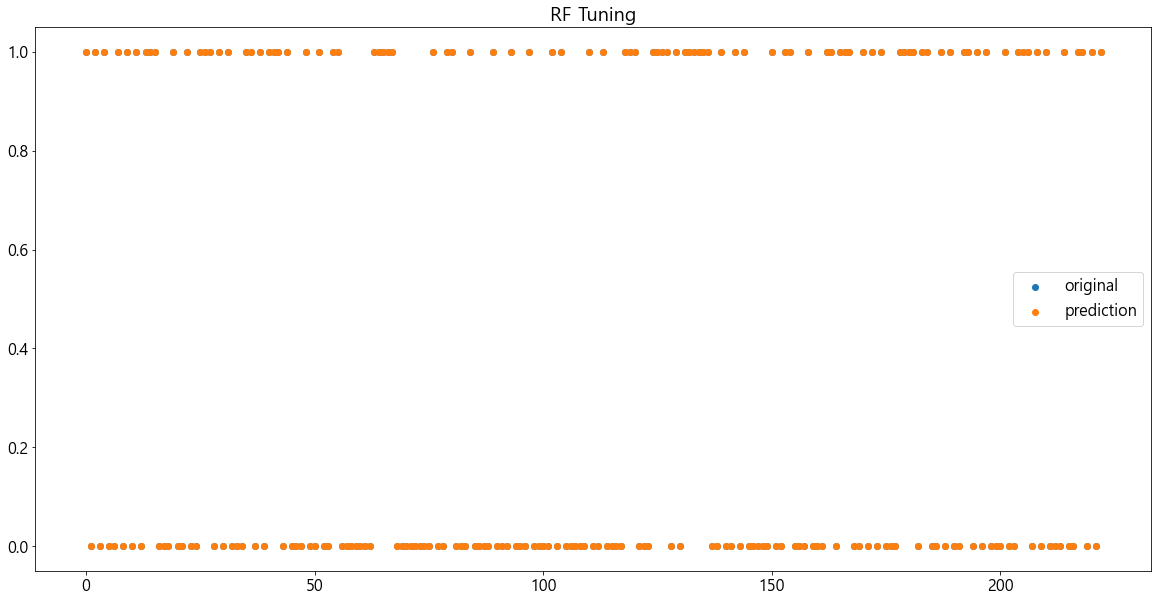

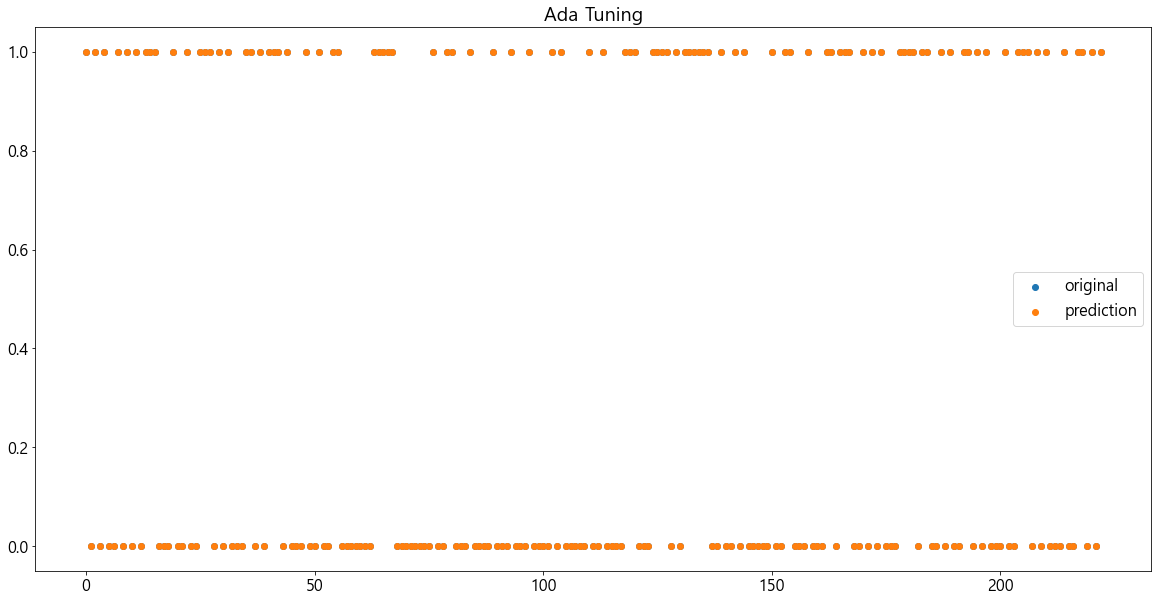

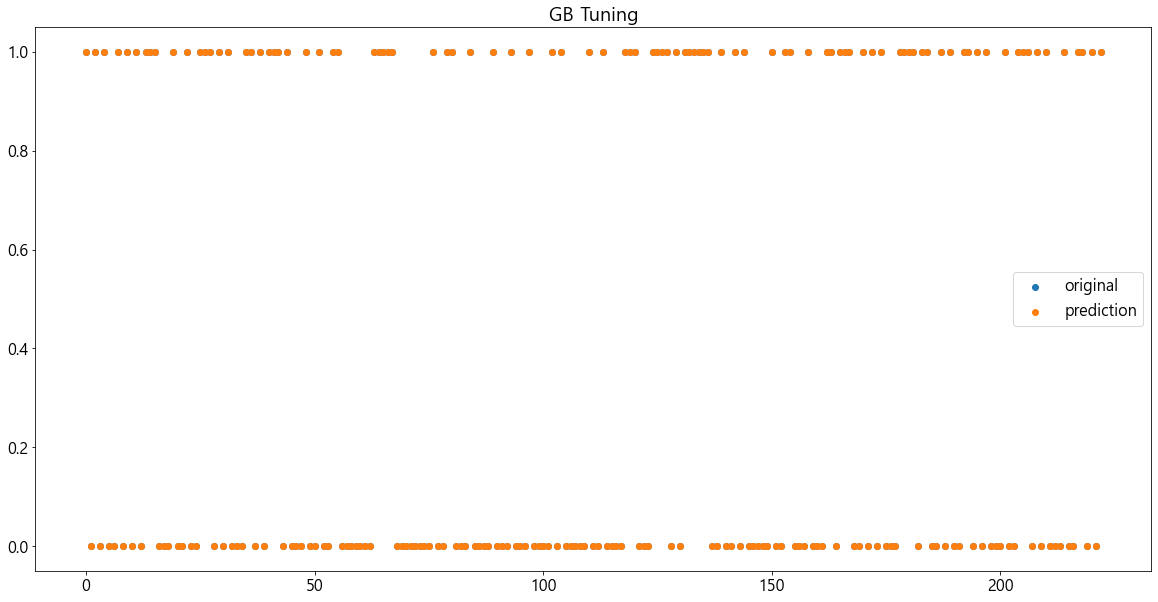

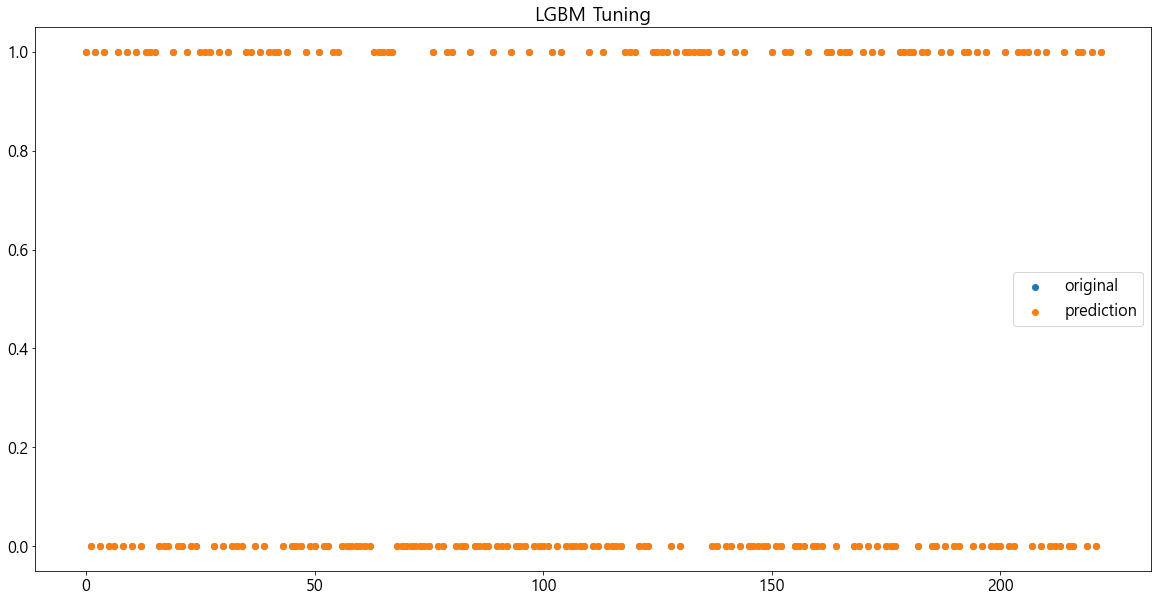

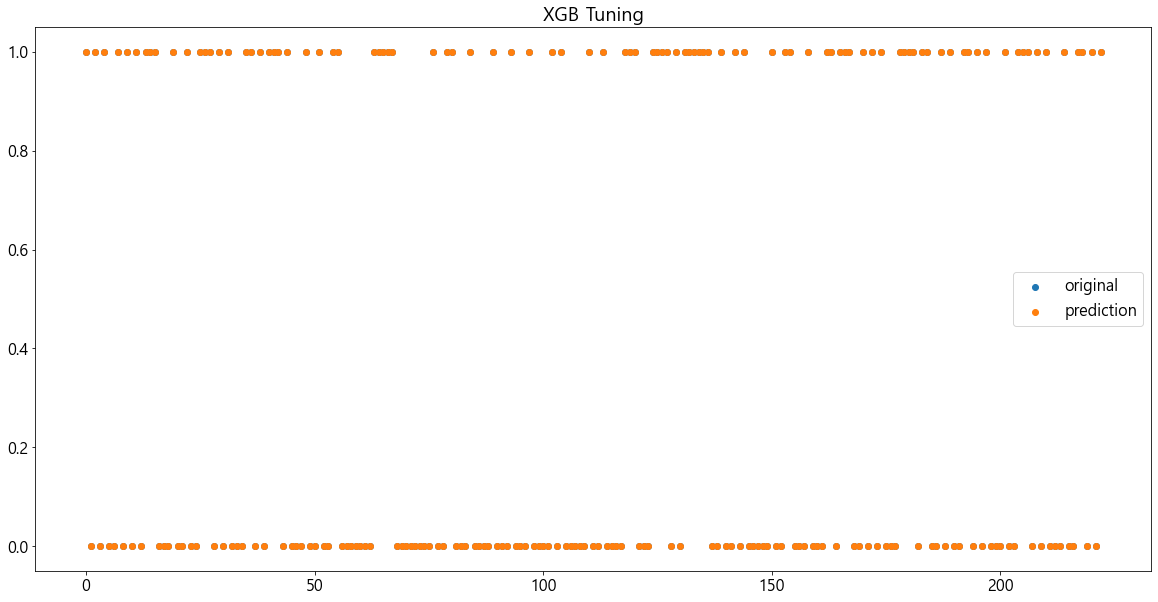

In [102]:
# 예측 결과와 진짜 결과의 패턴을 시각화
for idx, pred in enumerate(pred_list) :
    plt.scatter(list(range(len(y_test))), y_test, label='original')
    plt.scatter(list(range(len(pred))), pred, label='prediction')
    plt.title(result_name[idx])
    plt.legend()
    plt.show()

- 모든 모델이 성능이 매우 뛰어나나 확률 그래프와 다른 그래프들을 종합했을 때 몇 가지가 선정되고 그중에 GradientBooting Tuning 모델을 사용하겠다.

### 선정된 모델에 전체 데이터를 학습시킨다.

In [105]:
best_model = tuning_model[6]

best_model.fit(X, y)

GradientBoostingClassifier(n_estimators=50, random_state=1)

### 예측한다.

In [106]:
df20.reset_index(inplace=True, drop=True)
df20

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,name2,FirstName,Mean,Max,Min,Diff
0,3,1,34.5,0,0,376,7.8292,1,401,12,544,0.329856,0.750000,0.000000,0.750000
1,3,0,47.0,1,0,582,7.0000,2,846,13,546,0.482421,0.792000,0.111111,0.680889
2,2,1,62.0,0,0,184,9.6875,1,552,12,1011,0.359945,0.500000,0.156673,0.343327
3,3,1,27.0,0,0,366,8.6625,2,854,12,37,0.288287,0.611111,0.000000,0.611111
4,3,0,22.0,1,1,338,12.2875,2,342,13,49,0.689209,1.000000,0.242363,0.757637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,32.0,0,0,711,8.0500,2,753,12,1119,0.248308,0.345395,0.116279,0.229116
414,1,0,39.0,0,0,834,108.9000,0,593,3,366,0.520990,0.742038,0.343658,0.398380
415,3,1,38.5,0,0,872,7.2500,2,699,12,973,0.253352,0.345395,0.076923,0.268472
416,3,1,32.0,0,0,579,8.0500,2,827,12,390,0.223336,0.345395,0.000000,0.345395


In [107]:
# 표준화
X = scaler1.transform(df20)
X

array([[ 0.84191642,  0.74349692,  0.35542961, ...,  0.15499464,
        -0.80258531,  0.80661161],
       [ 0.84191642, -1.34499549,  1.30264102, ...,  0.3284041 ,
         0.04946442,  0.41458928],
       [-0.35209072,  0.74349692,  2.43929472, ..., -0.87720455,
         0.39885425, -1.50018018],
       ...,
       [ 0.84191642,  0.74349692,  0.65853726, ..., -1.51553825,
        -0.21270473, -1.92478514],
       [ 0.84191642,  0.74349692,  0.16598733, ..., -1.51553825,
        -0.80258531, -1.48845061],
       [ 0.84191642,  0.74349692, -1.87998932, ...,  1.18719383,
         0.6460469 ,  1.15314593]])

In [108]:
# 예측한다.
y_pred1 = best_model.predict(X)

In [109]:
y_pred1

array([0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1.

In [110]:
# 저장한다.
df2['Survived'] = y_pred1
df2.to_csv('data/titanic_result.csv')